<a href="https://colab.research.google.com/github/ASatya-J107/Data_Science_Project_7_Exam_Score_Prediction_Model_Deployment/blob/main/Data_Science_Project_7_Exam_Score_Prediction_Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Relevant Library**

---



In [35]:
#Standard libraries for data analysis:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

import joblib
import pickle

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import time

# **Import Dataset**

---



This project uses the dataset "students exam scores: Extended Dataset.csv," which can be downloaded from https://www.kaggle.com/datasets/desalegngeb/students-exam-scores.

In [36]:
url = ('https://raw.githubusercontent.com/ASatya-J107/Data_Science_Project_7_Exam_Score_Prediction_Model_Deployment/main/Expanded_data_with_more_features.csv')
dataset = pd.read_csv(url)

In [37]:
dataset

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [47]:
checking = []

for col in dataset.columns:
    dtypes = dataset[col].dtypes
    isnull = dataset[col].isnull().sum()
    notnull = dataset[col].notna().sum()
    nunique = dataset[col].nunique()
    unique = dataset[col].unique()

    checking.append([col, dtypes, isnull, notnull, nunique, unique])
    check = pd.DataFrame(checking)

check.columns = ['col', 'dtypes', 'isnull', 'notnull', 'nunique', 'unique']
check

,col,dtypes,isnull,notnull,nunique,unique
0,Unnamed: 0,int64,0,30641,1000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Gender,object,0,30641,2,"[female, male]"
2,EthnicGroup,object,1840,28801,5,"[nan, group C, group B, group A, group D, grou..."
3,ParentEduc,object,1845,28796,6,"[bachelor's degree, some college, master's deg..."
4,LunchType,object,0,30641,2,"[standard, free/reduced]"
5,TestPrep,object,1830,28811,2,"[none, nan, completed]"
6,ParentMaritalStatus,object,1190,29451,4,"[married, single, widowed, nan, divorced]"
7,PracticeSport,object,631,30010,3,"[regularly, sometimes, never, nan]"
8,IsFirstChild,object,904,29737,2,"[yes, no, nan]"
9,NrSiblings,float64,1572,29069,8,"[3.0, 0.0, 4.0, 1.0, nan, 2.0, 5.0, 7.0, 6.0]"


# **Data Cleansing**

---





In [7]:
#drop the first column
dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
dataset

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [9]:
dt=dataset

In [10]:
#check the duplicated data
duplicate_row = dt[dt.duplicated()]
print("Jumlah baris terduplikasi: ", duplicate_row.shape)

Jumlah baris terduplikasi:  (0, 14)


In [11]:
#cek the uniqueness
for column in dt.columns:
    num_distinct_values = len(dt[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Gender: 2 distinct values
EthnicGroup: 6 distinct values
ParentEduc: 7 distinct values
LunchType: 2 distinct values
TestPrep: 3 distinct values
ParentMaritalStatus: 5 distinct values
PracticeSport: 4 distinct values
IsFirstChild: 3 distinct values
NrSiblings: 9 distinct values
TransportMeans: 3 distinct values
WklyStudyHours: 4 distinct values
MathScore: 95 distinct values
ReadingScore: 90 distinct values
WritingScore: 93 distinct values


In [12]:
# Mapping the Studyhours
study_mapping = {
    '< 5': 'Less than 5 hours',
    '5 - 10': 'Between 5-10 hours',
    '> 10': 'More than 10 hours'
}
dt['WklyStudyHours'] = dt['WklyStudyHours'].map(study_mapping)
# Clean Non Alphanumeric Values from ParentEduc
dt['ParentEduc']=dt['ParentEduc'].str.replace("'", "")
dt['ParentEduc']=dt['ParentEduc'].str.replace("some high school", "high school")
dt['ParentEduc']=dt['ParentEduc'].str.replace("some college", "college")

In [13]:
#checking the dataset
dt

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelors degree,standard,none,married,regularly,yes,3.0,school_bus,Less than 5 hours,71,71,74
1,female,group C,college,standard,NaN,married,sometimes,yes,0.0,NaN,Between 5-10 hours,69,90,88
2,female,group B,masters degree,standard,none,single,sometimes,yes,4.0,school_bus,Less than 5 hours,87,93,91
3,male,group A,associates degree,free/reduced,none,married,never,no,1.0,NaN,Between 5-10 hours,45,56,42
4,male,group C,college,standard,none,married,sometimes,yes,0.0,school_bus,Between 5-10 hours,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,Between 5-10 hours,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,Between 5-10 hours,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,Between 5-10 hours,61,70,67
30639,female,group D,associates degree,standard,completed,married,regularly,no,3.0,school_bus,Between 5-10 hours,82,90,93


# **Handling the missing values**

---



In [14]:
# Checking the missing values
print(dt.isnull().sum())

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


In [15]:
# Interpolate for numericial value
dt['NrSiblings'] = dt['NrSiblings'].interpolate()

# Use Mode for categoricial columns
dt['EthnicGroup'] = dt['EthnicGroup'].fillna(dt['EthnicGroup'].mode()[0])
dt['WklyStudyHours'] = dt['WklyStudyHours'].fillna(dt['WklyStudyHours'].mode()[0])
dt['ParentEduc'] = dt['ParentEduc'].fillna(dt['ParentEduc'].mode()[0])
dt['ParentMaritalStatus'] = dt['ParentMaritalStatus'].fillna(dt['ParentMaritalStatus'].mode()[0])

# Use Mode for binary columns
dt['IsFirstChild'] = dt['IsFirstChild'].fillna(dt['IsFirstChild'].mode()[0])
dt['PracticeSport'] = dt['PracticeSport'].fillna(dt['PracticeSport'].mode()[0])
dt['TestPrep'] = dt['TestPrep'].fillna(dt['TestPrep'].mode()[0])
dt['TransportMeans'] = dt['TransportMeans'].fillna(dt['TransportMeans'].mode()[0])

In [16]:
#recheck the missing values
print(dt.isnull().sum())

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64


all missing values has been handled

In [17]:
#check the data set summary
dt.describe().style.format("{:.2f}")

,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.00,30641.00,30641.00,30641.00
mean,2.15,66.56,69.38,68.42
std,1.44,15.36,14.76,15.44
min,0.00,0.00,10.00,4.00
25%,1.00,56.00,59.00,58.00
50%,2.00,67.00,70.00,69.00
75%,3.00,78.00,80.00,79.00
max,7.00,100.00,100.00,100.00


# **Exploratory Data Analysis**

---



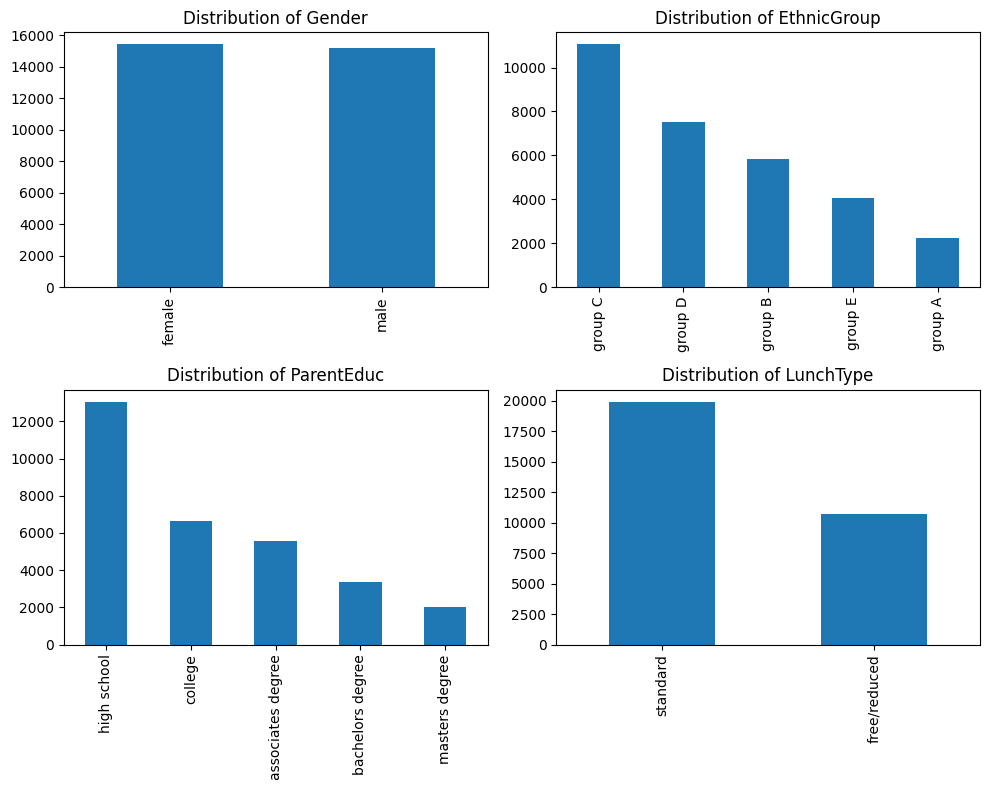

In [18]:
# Create a figure and four subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate over the columns and create the distribution plots
columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType']
for i, col in enumerate(columns):
    ax = axs[i//2, i%2]
    dataset[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribution of {col}")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged graph
plt.show()

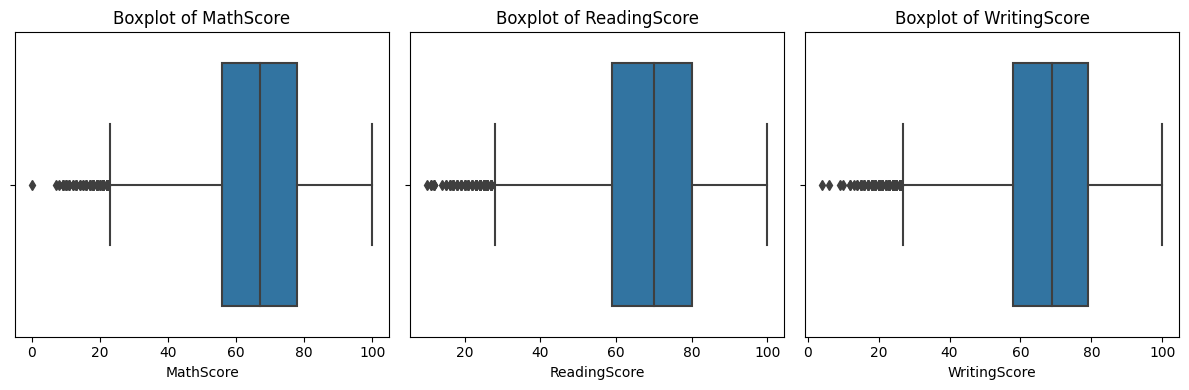

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

columns = ['MathScore', 'ReadingScore', 'WritingScore']
for i, col in enumerate(columns):
    ax = axs[i]
    sns.boxplot(x=dataset[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()

plt.show()

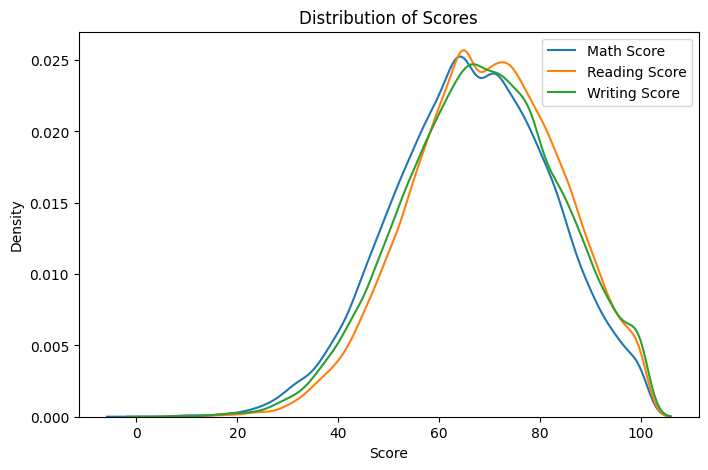

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Distribution plot of MathScore
sns.distplot(dataset['MathScore'], hist=False, kde=True, label='Math Score')

# Distribution plot of ReadingScore
sns.distplot(dataset['ReadingScore'], hist=False, kde=True, label='Reading Score')

# Distribution plot of WritingScore
sns.distplot(dataset['WritingScore'], hist=False, kde=True, label='Writing Score')

# Set axis labels and title
ax.set_xlabel('Score')
ax.set_ylabel('Density')
ax.set_title('Distribution of Scores')

# Add a legend
ax.legend()

# Display the combined distribution plot
plt.show()


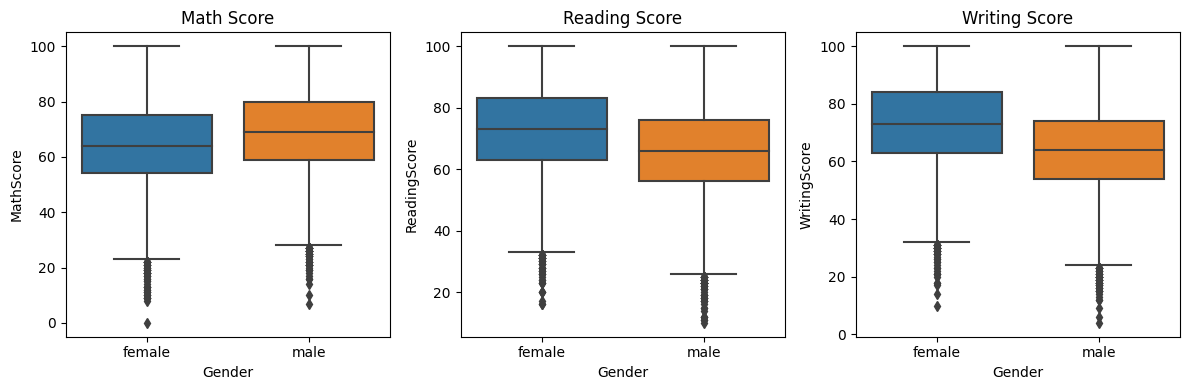

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.boxplot(ax=axs[0], x='Gender', y='MathScore', data=dataset)
axs[0].set_title('Math Score')

sns.boxplot(ax=axs[1], x='Gender', y='ReadingScore', data=dataset)
axs[1].set_title('Reading Score')

sns.boxplot(ax=axs[2], x='Gender', y='WritingScore', data=dataset)
axs[2].set_title('Writing Score')

plt.tight_layout()

plt.show()

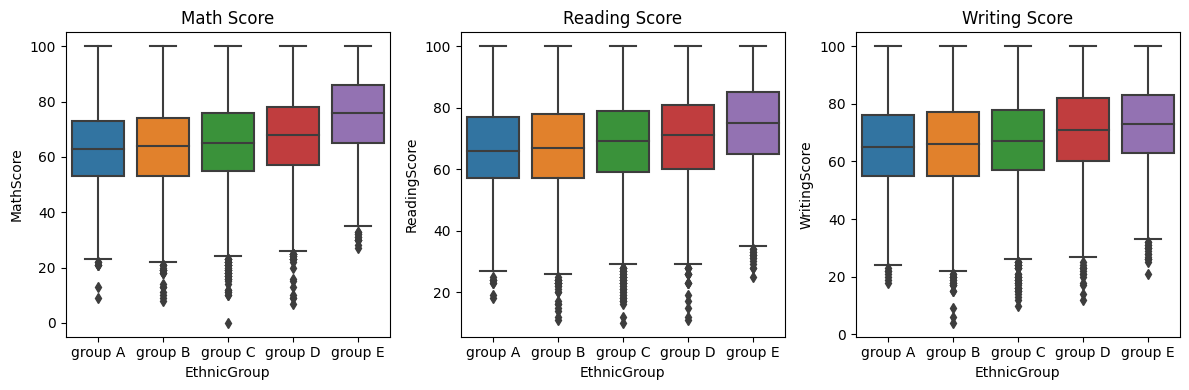

In [21]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sorted_dataset = dataset.sort_values(by='EthnicGroup')

# Box plot of MathScore by EthnicGroup
sns.boxplot(ax=axs[0], x='EthnicGroup', y='MathScore', data=sorted_dataset)
axs[0].set_title('Math Score')

# Box plot of ReadingScore by EthnicGroup
sns.boxplot(ax=axs[1], x='EthnicGroup', y='ReadingScore', data=sorted_dataset)
axs[1].set_title('Reading Score')

# Box plot of WritingScore by EthnicGroup
sns.boxplot(ax=axs[2], x='EthnicGroup', y='WritingScore', data=sorted_dataset)
axs[2].set_title('Writing Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

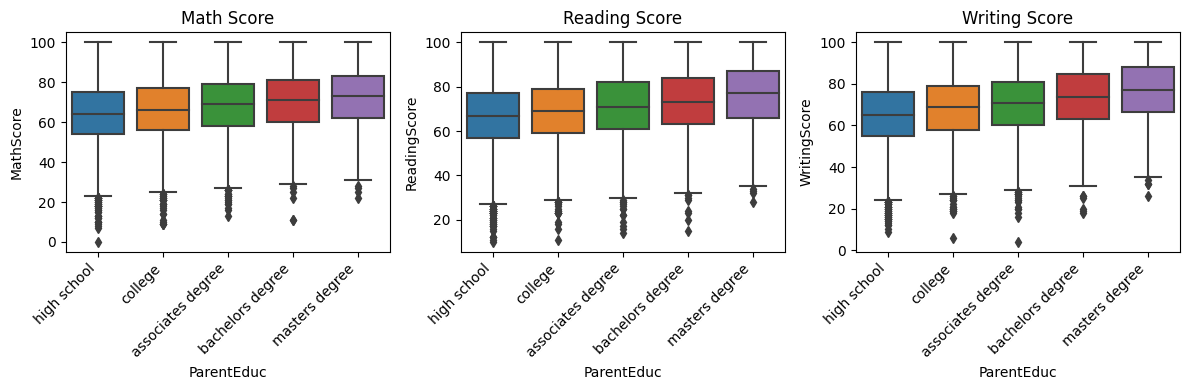

In [22]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Define the desired order for 'ParentEduc'
desired_order = [
    'high school',
    'college',
    'associates degree',
    'bachelors degree',
    'masters degree'
]

# Create a sorted copy of the dataset by 'ParentEduc'
sorted_dataset = dataset.copy()
sorted_dataset['ParentEduc'] = pd.Categorical(sorted_dataset['ParentEduc'], categories=desired_order, ordered=True)
sorted_dataset = sorted_dataset.sort_values(by='ParentEduc')

# Box plot of MathScore by ParentEduc
sns.boxplot(ax=axs[0], x='ParentEduc', y='MathScore', data=sorted_dataset)
axs[0].set_title('Math Score')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Box plot of ReadingScore by ParentEduc
sns.boxplot(ax=axs[1], x='ParentEduc', y='ReadingScore', data=sorted_dataset)
axs[1].set_title('Reading Score')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# Box plot of WritingScore by ParentEduc
sns.boxplot(ax=axs[2], x='ParentEduc', y='WritingScore', data=sorted_dataset)
axs[2].set_title('Writing Score')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

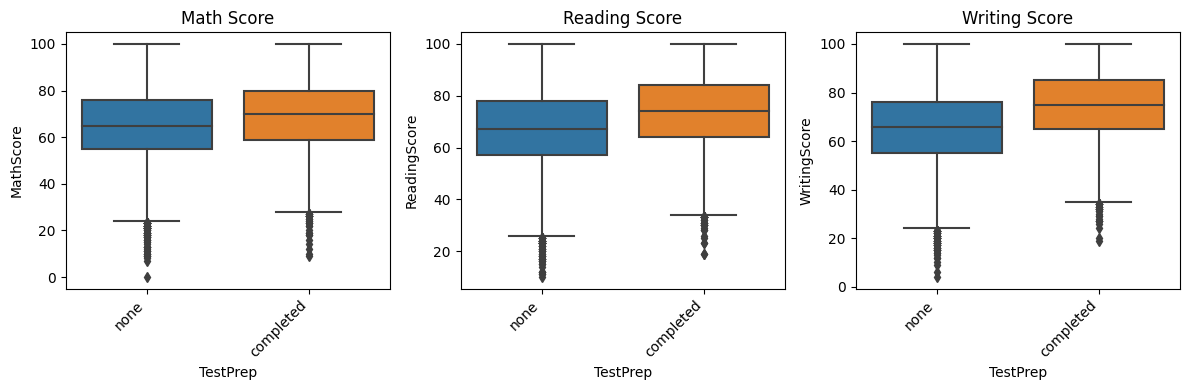

In [26]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by TestPrep
sns.boxplot(ax=axs[0], x='TestPrep', y='MathScore', data=dataset)
axs[0].set_title('Math Score')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Box plot of ReadingScore by TestPrep
sns.boxplot(ax=axs[1], x='TestPrep', y='ReadingScore', data=dataset)
axs[1].set_title('Reading Score')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# Box plot of WritingScore by TestPrep
sns.boxplot(ax=axs[2], x='TestPrep', y='WritingScore', data=dataset)
axs[2].set_title('Writing Score')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

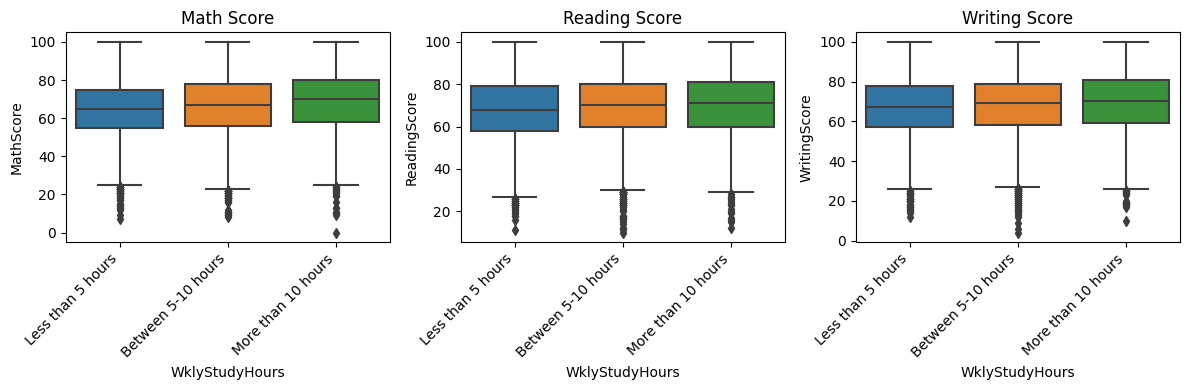

In [24]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by WklyStudyHours
sns.boxplot(ax=axs[0], x='WklyStudyHours', y='MathScore', data=dataset)
axs[0].set_title('Math Score')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Box plot of ReadingScore by WklyStudyHours
sns.boxplot(ax=axs[1], x='WklyStudyHours', y='ReadingScore', data=dataset)
axs[1].set_title('Reading Score')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# Box plot of WritingScore by WklyStudyHours
sns.boxplot(ax=axs[2], x='WklyStudyHours', y='WritingScore', data=dataset)
axs[2].set_title('Writing Score')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

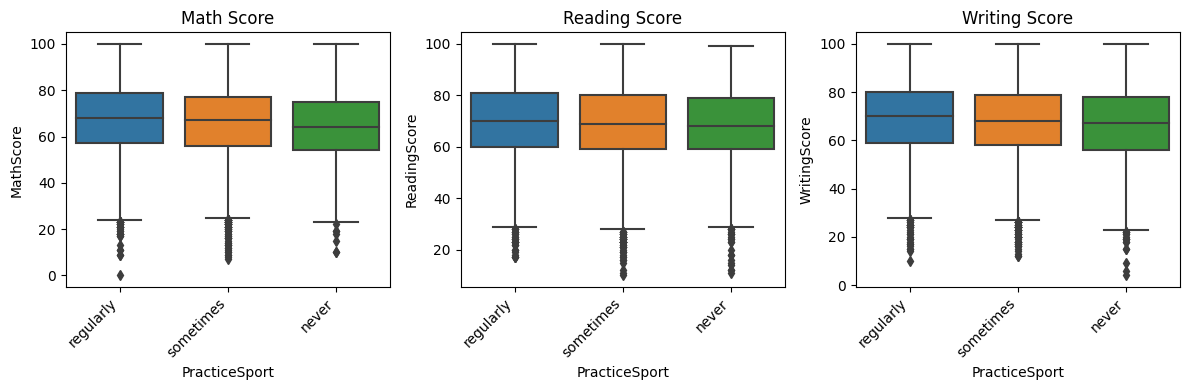

In [27]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by PracticeSport
sns.boxplot(ax=axs[0], x='PracticeSport', y='MathScore', data=dataset)
axs[0].set_title('Math Score')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Box plot of ReadingScore by PracticeSport
sns.boxplot(ax=axs[1], x='PracticeSport', y='ReadingScore', data=dataset)
axs[1].set_title('Reading Score')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# Box plot of WritingScore by PracticeSport
sns.boxplot(ax=axs[2], x='PracticeSport', y='WritingScore', data=dataset)
axs[2].set_title('Writing Score')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()


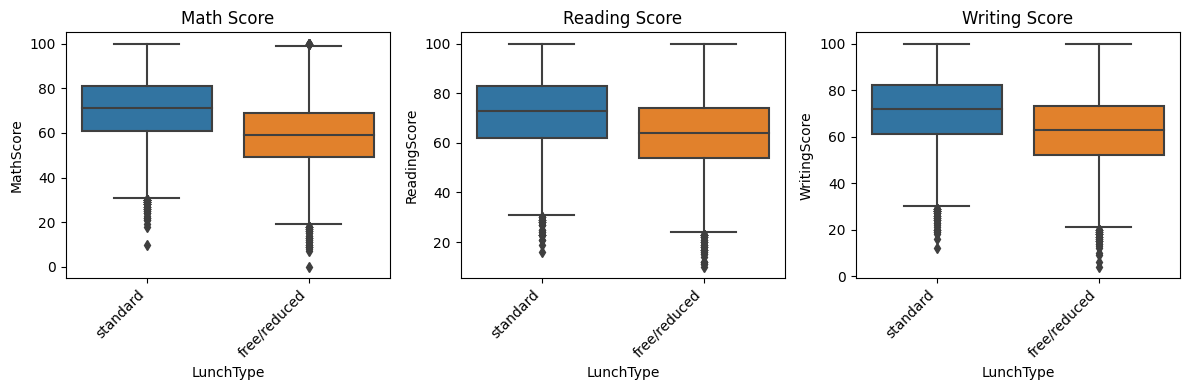

In [28]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by LunchType
sns.boxplot(ax=axs[0], x='LunchType', y='MathScore', data=dataset)
axs[0].set_title('Math Score')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Box plot of ReadingScore by LunchType
sns.boxplot(ax=axs[1], x='LunchType', y='ReadingScore', data=dataset)
axs[1].set_title('Reading Score')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# Box plot of WritingScore by LunchType
sns.boxplot(ax=axs[2], x='LunchType', y='WritingScore', data=dataset)
axs[2].set_title('Writing Score')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

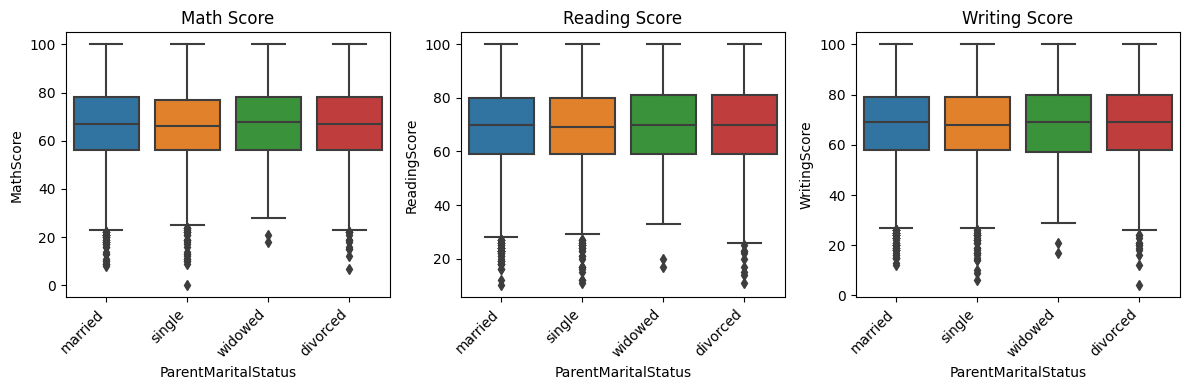

In [29]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by ParentMaritalStatus
sns.boxplot(ax=axs[0], x='ParentMaritalStatus', y='MathScore', data=dataset)
axs[0].set_title('Math Score')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Box plot of ReadingScore by ParentMaritalStatus
sns.boxplot(ax=axs[1], x='ParentMaritalStatus', y='ReadingScore', data=dataset)
axs[1].set_title('Reading Score')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# Box plot of WritingScore by ParentMaritalStatus
sns.boxplot(ax=axs[2], x='ParentMaritalStatus', y='WritingScore', data=dataset)
axs[2].set_title('Writing Score')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

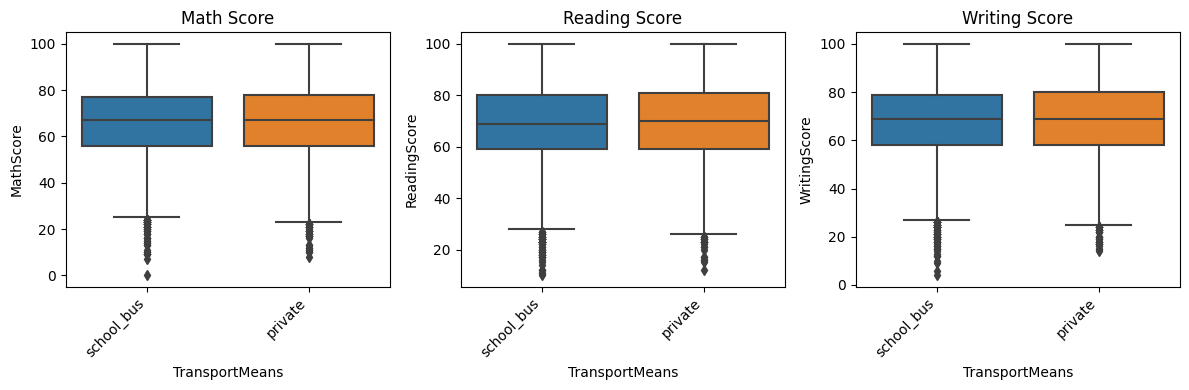

In [30]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by TransportMeans
sns.boxplot(ax=axs[0], x='TransportMeans', y='MathScore', data=dataset)
axs[0].set_title('Math Score')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Box plot of ReadingScore by TransportMeans
sns.boxplot(ax=axs[1], x='TransportMeans', y='ReadingScore', data=dataset)
axs[1].set_title('Reading Score')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# Box plot of WritingScore by TransportMeans
sns.boxplot(ax=axs[2], x='TransportMeans', y='WritingScore', data=dataset)
axs[2].set_title('Writing Score')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

# **Label Encoding**

---



In [ ]:
data = dt.copy()
#cek the uniqueness
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Gender: 2 distinct values
EthnicGroup: 5 distinct values
ParentEduc: 5 distinct values
LunchType: 2 distinct values
TestPrep: 2 distinct values
ParentMaritalStatus: 4 distinct values
PracticeSport: 3 distinct values
IsFirstChild: 2 distinct values
NrSiblings: 34 distinct values
TransportMeans: 2 distinct values
WklyStudyHours: 3 distinct values
MathScore: 95 distinct values
ReadingScore: 90 distinct values
WritingScore: 93 distinct values


In [ ]:
# Mapping the Gender
gender_mapping = {
    'female': 0,
    'male': 1
}

# Mapping the LunchType
lunch_mapping = {
    'free/reduced': 0,
    'standard': 1
}

# Converting IsFirstChild to object type
data['IsFirstChild'] = dt['IsFirstChild'].astype(object)

# Mapping the IsFirstChild
value_mapping = {
    'no': 0,
    'yes': 1
}

# Mapping the TestPrep
test_mapping = {
    'none': 0,
    'completed': 1
}

# Mapping the Schoolbus
bus_mapping = {
    'private': 0,
    'school_bus': 1
}

# Mapping the Sport Activity
sport_mapping = {
    'never': 0,
    'sometimes': 1,
    'regularly': 2
}

# Mapping the Parent Education
pedu_mapping = {
    'high school': 0,
    'college': 1,
    'associates degree': 2,
    'bachelors degree':3,
    'masters degree':4
}

# Mapping the Weekly Study Hours
weekly_mapping = {
    'Less than 5 hours': 0,
    'Between 5-10 hours': 1,
    'More than 10 hours': 2
}

# Mapping the Ethnic Group
ethnic_mapping = {
    'group A': 0,
    'group B': 1,
    'group C': 2,
    'group D': 3,
    'group E': 4
}

# Fixing the values in the column
data['Gender'] = data['Gender'].map(gender_mapping)
data['LunchType'] = data['LunchType'].map(lunch_mapping)
data['IsFirstChild'] = data['IsFirstChild'].map(value_mapping)
data['TestPrep'] = data['TestPrep'].map(test_mapping)
data['TransportMeans'] = data['TransportMeans'].map(bus_mapping)
data['PracticeSport'] = data['PracticeSport'].map(sport_mapping)
data['ParentEduc'] = data['ParentEduc'].map(pedu_mapping)
data['WklyStudyHours'] = data['WklyStudyHours'].map(weekly_mapping)
data['EthnicGroup'] = data['EthnicGroup'].map(ethnic_mapping)
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,2,3,1,0,married,2,1,3.0,1,0,71,71,74
1,0,2,1,1,0,married,1,1,0.0,1,1,69,90,88
2,0,1,4,1,0,single,1,1,4.0,1,0,87,93,91
3,1,0,2,0,0,married,0,0,1.0,1,1,45,56,42
4,1,2,1,1,0,married,1,1,0.0,1,1,76,78,75


# **One Hot Encoding**

---



In [ ]:
dt.dtypes

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [ ]:
categorical_cols = ['ParentMaritalStatus']


for col in categorical_cols:
    data = pd.get_dummies(data, columns=[col], prefix = [col], drop_first=False)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        30641 non-null  int64  
 1   EthnicGroup                   30641 non-null  int64  
 2   ParentEduc                    30641 non-null  int64  
 3   LunchType                     30641 non-null  int64  
 4   TestPrep                      30641 non-null  int64  
 5   PracticeSport                 30641 non-null  int64  
 6   IsFirstChild                  30641 non-null  int64  
 7   NrSiblings                    30641 non-null  float64
 8   TransportMeans                30641 non-null  int64  
 9   WklyStudyHours                30641 non-null  int64  
 10  MathScore                     30641 non-null  int64  
 11  ReadingScore                  30641 non-null  int64  
 12  WritingScore                  30641 non-null  int64  
 13  P

# **Correlation Matrix**

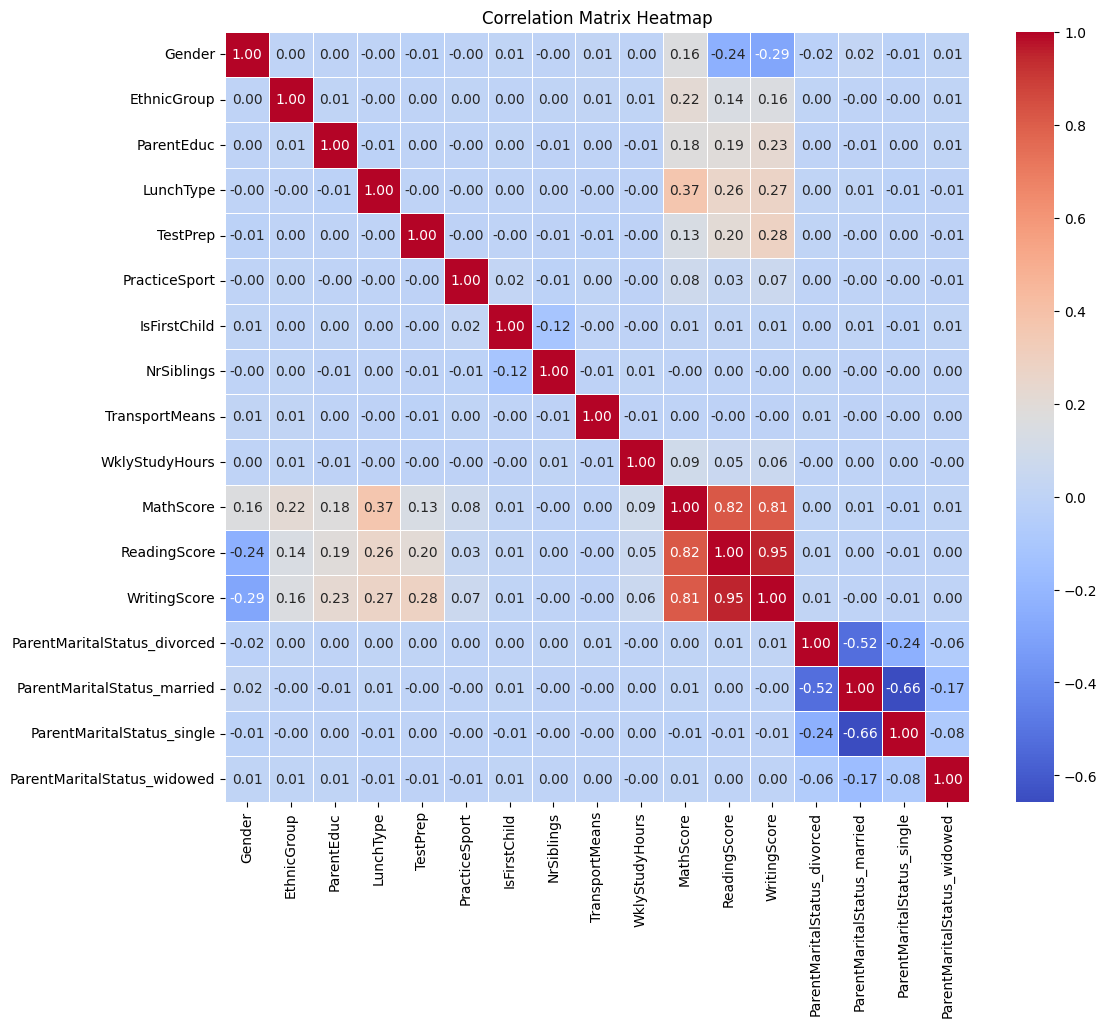

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

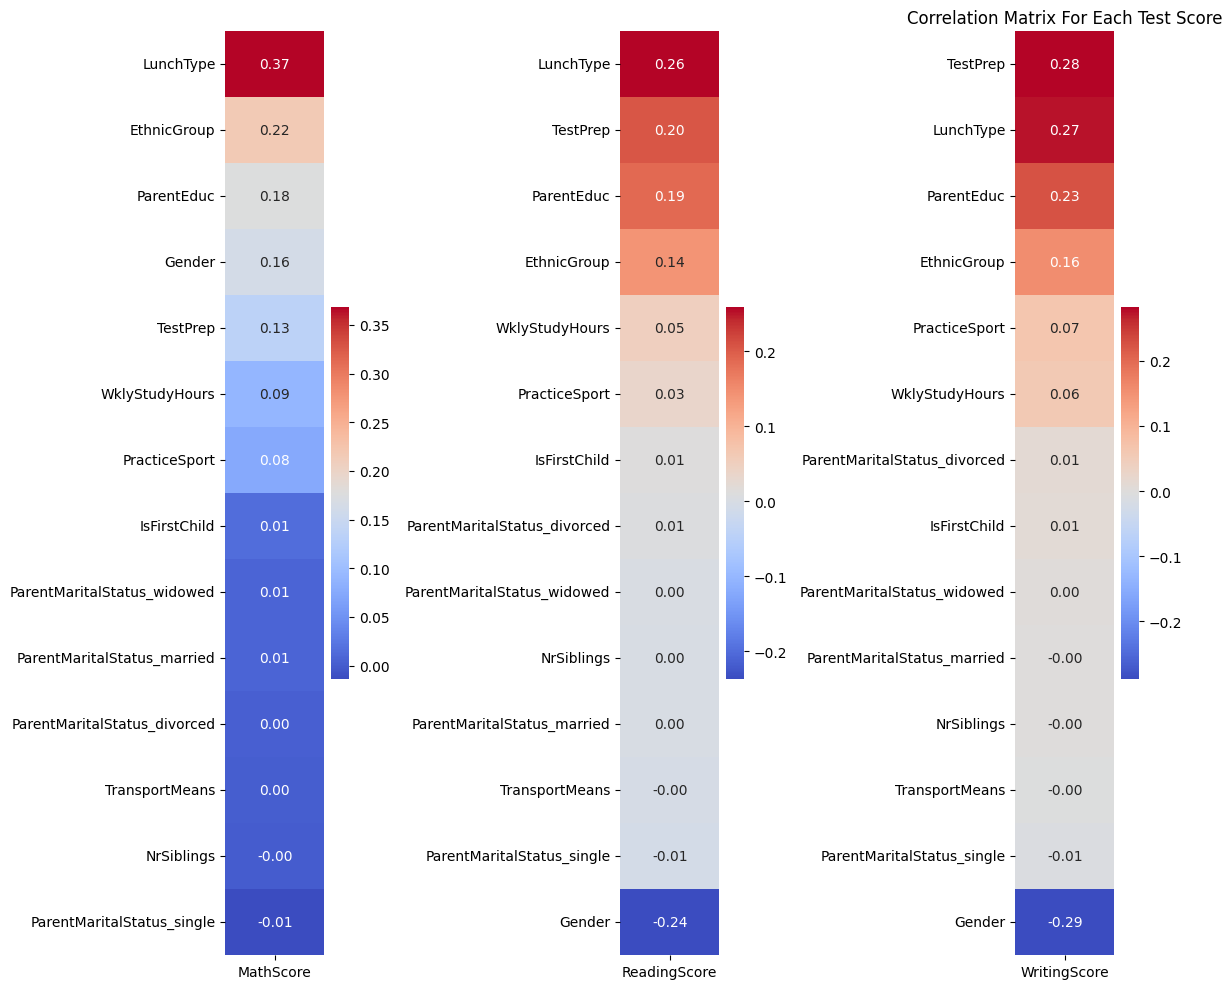

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 10))
corr = data.corr()
plt.title("Correlation Matrix For Each Test Score")
#correlation for math score
target_corr_math = corr['MathScore'].drop(['MathScore', 'ReadingScore', 'WritingScore'])
target_corr_math_sorted = target_corr_math.sort_values(ascending=False)
sns.heatmap(target_corr_math_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', ax=axs[0])
#axs[0].title(f'Correlation with {target_corr_math.name}')

#correlation for reading score
target_corr_read = corr['ReadingScore'].drop(['MathScore', 'ReadingScore', 'WritingScore'])
target_corr_read_sorted = target_corr_read.sort_values(ascending=False)
sns.heatmap(target_corr_read_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', ax=axs[1])
#axs[1].title(f'Correlation with {target_corr_read.name}')

#correlation for write score
target_corr_write = corr['WritingScore'].drop(['MathScore', 'ReadingScore', 'WritingScore'])
target_corr_write_sorted = target_corr_write.sort_values(ascending=False)
sns.heatmap(target_corr_write_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', ax=axs[2])
#axs[2].title(f'Correlation with {target_corr_write.name}')
plt.tight_layout()

plt.show()

# **Remove Unnecessary Features**

In [ ]:
# Filter parameter yang tidak mempangaruhi skor dengan threshold correlation -0.05 s/d 0.05
target_columns = ['MathScore', 'ReadingScore', 'WritingScore']

correlation_threshold = 0.05
filtered_variables = {target: set() for target in target_columns}

for target_column in target_columns:
    target_corr = corr[target_column].drop(target_column)
    filtered_corr = target_corr[(target_corr >= -correlation_threshold) & (target_corr <= correlation_threshold)]
    filtered_variables[target_column].update(filtered_corr.index)

intersection_variables = set.intersection(*filtered_variables.values())

print("Variables with correlations within the range (-0.05 to 0.05) for all three target variables:")
print(intersection_variables)

Variables with correlations within the range (-0.05 to 0.05) for all three target variables:
{'ParentMaritalStatus_married', 'ParentMaritalStatus_widowed', 'NrSiblings', 'ParentMaritalStatus_single', 'IsFirstChild', 'ParentMaritalStatus_divorced', 'TransportMeans'}


In [ ]:
columns_to_drop = ['ParentMaritalStatus_divorced', 'TransportMeans', 'ParentMaritalStatus_single', 'NrSiblings', 'ParentMaritalStatus_married', 'IsFirstChild', 'ParentMaritalStatus_widowed']
data = data.drop(columns=columns_to_drop)
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,PracticeSport,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,2,3,1,0,2,0,71,71,74
1,0,2,1,1,0,1,1,69,90,88
2,0,1,4,1,0,1,0,87,93,91
3,1,0,2,0,0,0,1,45,56,42
4,1,2,1,1,0,1,1,76,78,75


# **Split the dataset into features and targets**

---



In [ ]:
#Split features from the dataset
features = data.drop(['MathScore', 'ReadingScore', 'WritingScore'], axis=1)

# Create a list of one-hot encoded columns and Save the list to a pickle file
one_hot_columns = features.columns
with open('one_hot_columns.pkl', 'wb') as f:
    pickle.dump(one_hot_columns, f)

#Split targets from the dataset
target_cols = ['MathScore', 'ReadingScore', 'WritingScore']
targets = data.loc[:, target_cols]

# **Feature Standardization**

---



In [ ]:
scaler = StandardScaler()
features2 = pd.DataFrame(scaler.fit_transform(features))
features2.columns = features.columns.values
features2.index = features.index.values
features = features2
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
features.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,PracticeSport,WklyStudyHours
0,-0.993267,-0.157089,1.437558,0.734413,-0.693717,1.181858,-1.375790
1,-0.993267,-0.157089,-0.137280,0.734413,-0.693717,-0.336392,0.151309
2,-0.993267,-1.061685,2.224977,0.734413,-0.693717,-0.336392,-1.375790
3,1.006779,-1.966281,0.650139,-1.361632,-0.693717,-1.854643,0.151309
4,1.006779,-0.157089,-0.137280,0.734413,-0.693717,-0.336392,0.151309


# **Split the dataset into training and testing sets**

In [ ]:
# Extract target columns from the DataFrame
y1 = targets["MathScore"]
y2 = targets["ReadingScore"]
y3 = targets["WritingScore"]

# Split the dataset into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(features, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(features, y2, test_size=0.2, random_state=42)
_, _, y3_train, y3_test = train_test_split(features, y3, test_size=0.2, random_state=42)

# **Model Evaluation**

---



# **Hyperparameter Tuning Elastic Net Regressio**n

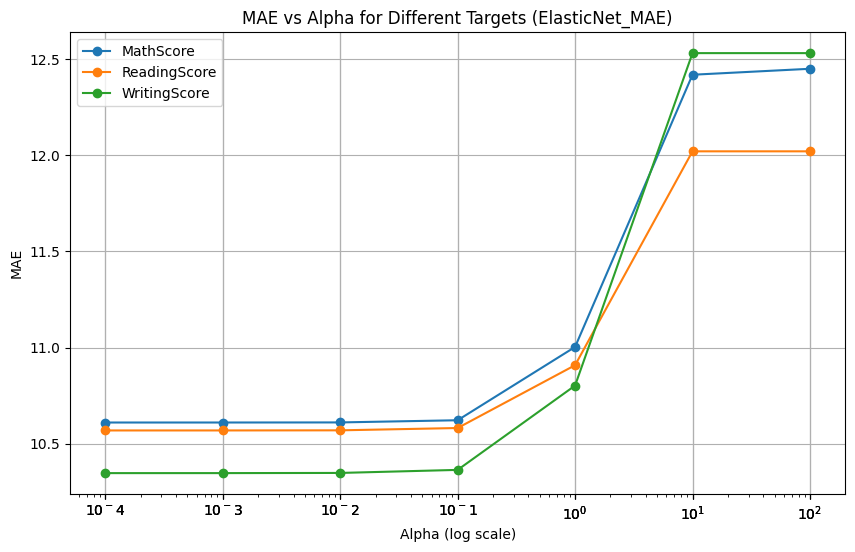

In [ ]:
# Define the alpha values for Elastic Net Regression
alpha_values = np.logspace(-4, 2, 7)

# Initialize a dictionary to store the results
elasticnet_results = {
    "Alpha": [],
    "Target": [],
    "MAE": []
}

# Perform K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alpha_values:
    for y_train, y_test, target_name in [(y1_train, y1_test, "MathScore"), (y2_train, y2_test, "ReadingScore"), (y3_train, y3_test, "WritingScore")]:
        mae_list = []

        for train_index, test_index in kf.split(X_train):
            X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

            elasticnet = ElasticNet(alpha=alpha)
            elasticnet.fit(X_train_fold, y_train_fold)
            y_pred_fold = elasticnet.predict(X_test_fold)

            mae_fold = mean_absolute_error(y_test_fold, y_pred_fold)
            mae_list.append(mae_fold)

        mae_mean = sum(mae_list) / len(mae_list)

        elasticnet_results["Alpha"].append(alpha)
        elasticnet_results["Target"].append(target_name)
        elasticnet_results["MAE"].append(mae_mean)

# Create a DataFrame from the results
ElasticNet_MAE = pd.DataFrame(elasticnet_results)

# Create line chart for ElasticNet_MAE
plt.figure(figsize=(10, 6))

# Loop through unique targets
for target in ElasticNet_MAE["Target"].unique():
    target_data = ElasticNet_MAE[ElasticNet_MAE["Target"] == target]
    plt.plot(target_data["Alpha"], target_data["MAE"], marker='o', label=target)

# Add labels and title
plt.xlabel("Alpha (log scale)")
plt.ylabel("MAE")
plt.title("MAE vs Alpha for Different Targets (ElasticNet_MAE)")
plt.legend()

# Use a logarithmic scale for the x-axis
plt.xscale("log")
plt.xticks(ElasticNet_MAE["Alpha"], [f"$10^{exp:.0f}$" for exp in np.log10(ElasticNet_MAE["Alpha"])])  # Format x-axis tick labels

# Display the chart
plt.grid(True)
plt.show()

# **Hyperparameter Tuning SVR**

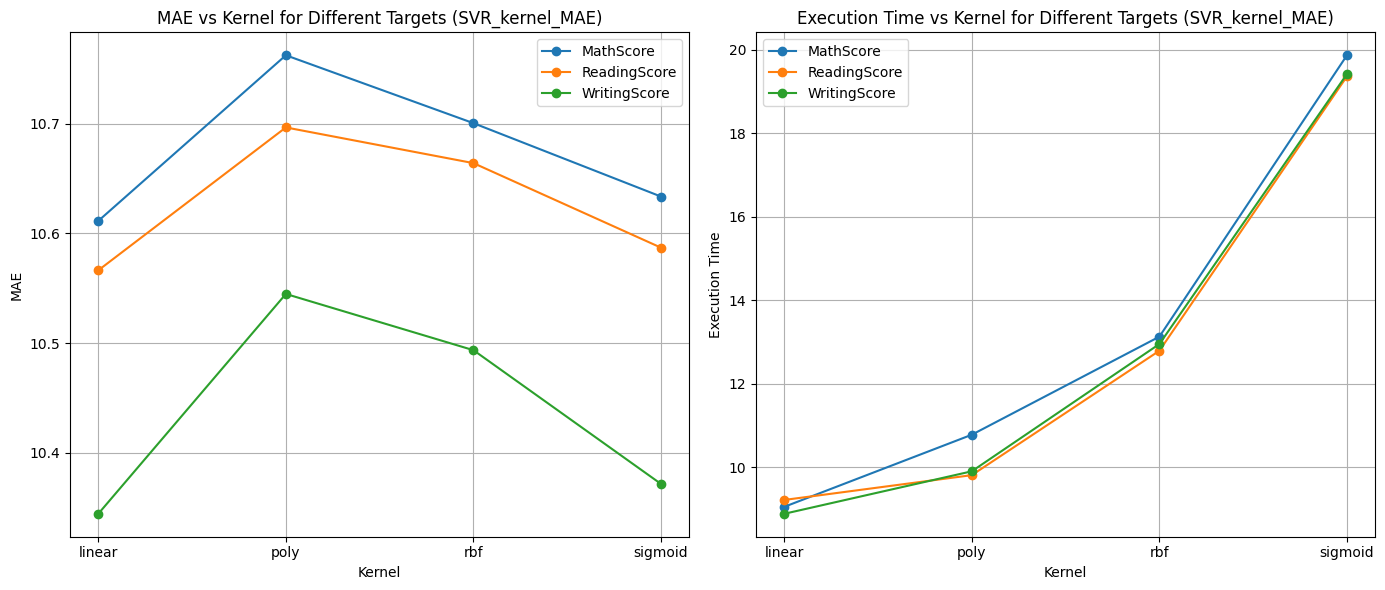

In [ ]:
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
c_value = 0.1
epsilon_value = 0.5

# Initialize a dictionary to store the results
svr_results = {
    "Kernel": [],
    "Target": [],
    "MAE": [],
    "Time": []
}

# Perform K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for kernel in kernel_values:
    for y_train, y_test, target_name in [(y1_train, y1_test, "MathScore"), (y2_train, y2_test, "ReadingScore"), (y3_train, y3_test, "WritingScore")]:
        mae_list = []
        time_list = []

        for train_index, test_index in kf.split(X_train):
            X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

            svr = SVR(C=c_value, kernel=kernel, epsilon=epsilon_value)

            start_time = time.time()
            svr.fit(X_train_fold, y_train_fold)
            end_time = time.time()

            y_pred_fold = svr.predict(X_test_fold)

            mae_fold = mean_absolute_error(y_test_fold, y_pred_fold)
            mae_list.append(mae_fold)
            time_list.append(end_time - start_time)

        mae_mean = sum(mae_list) / len(mae_list)
        time_mean = sum(time_list) / len(time_list)

        svr_results["Kernel"].append(kernel)
        svr_results["Target"].append(target_name)
        svr_results["MAE"].append(mae_mean)
        svr_results["Time"].append(time_mean)

# Create a DataFrame from the results
SVR_kernel_MAE = pd.DataFrame(svr_results)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Loop through unique targets for the first subplot
for target in SVR_kernel_MAE["Target"].unique():
    target_data = SVR_kernel_MAE[SVR_kernel_MAE["Target"] == target]
    ax1.plot(target_data["Kernel"], target_data["MAE"], marker='o', label=target)

# Add labels and title for the first subplot
ax1.set_xlabel("Kernel")
ax1.set_ylabel("MAE")
ax1.set_title("MAE vs Kernel for Different Targets (SVR_kernel_MAE)")
ax1.legend()
ax1.grid(True)

# Loop through unique targets for the second subplot
for target in SVR_kernel_MAE["Target"].unique():
    target_data = SVR_kernel_MAE[SVR_kernel_MAE["Target"] == target]
    ax2.plot(target_data["Kernel"], target_data["Time"], marker='o', label=target)

# Add labels and title for the second subplot
ax2.set_xlabel("Kernel")
ax2.set_ylabel("Execution Time")
ax2.set_title("Execution Time vs Kernel for Different Targets (SVR_kernel_MAE)")
ax2.legend()
ax2.grid(True)

# Display the subplots
plt.tight_layout()
plt.show()

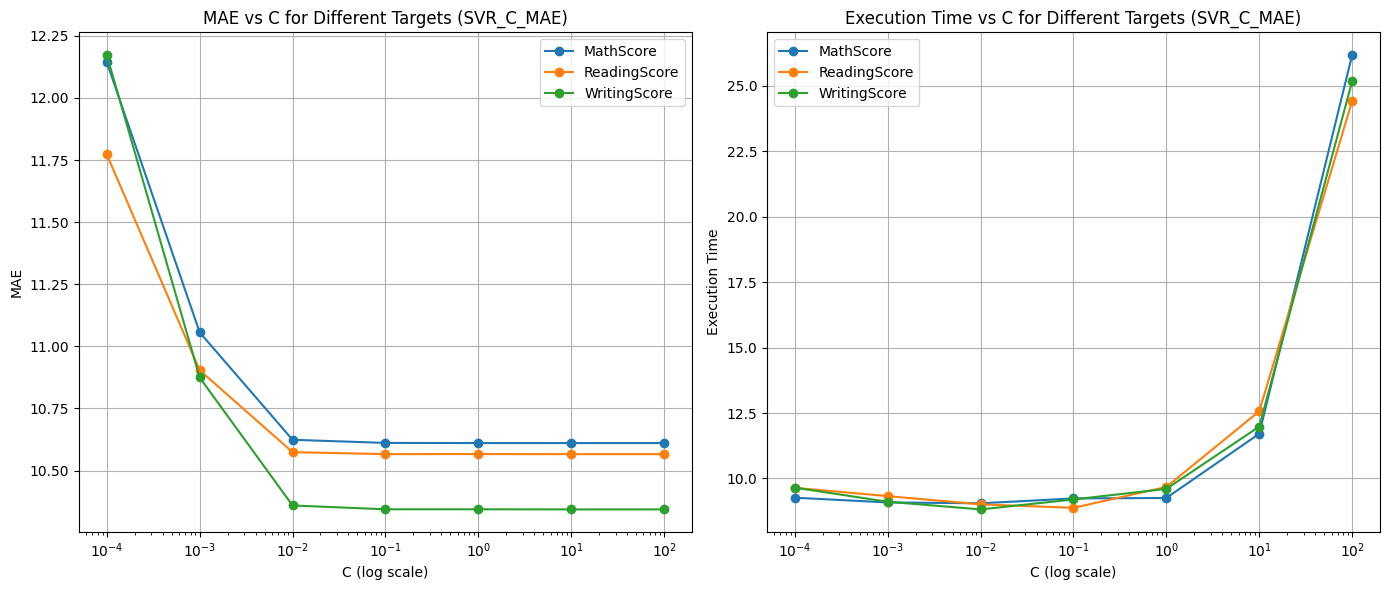

In [ ]:
C_values = np.logspace(-4, 2, 7)

# Initialize a dictionary to store the results
svr_results = {
    "C": [],
    "Target": [],
    "MAE": [],
    "Time": []
}

# Perform K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for C in C_values:
    for y_train, y_test, target_name in [(y1_train, y1_test, "MathScore"), (y2_train, y2_test, "ReadingScore"), (y3_train, y3_test, "WritingScore")]:
        mae_list = []
        time_list = []

        for train_index, test_index in kf.split(X_train):
            X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

            svr = SVR(C=C, kernel='linear', epsilon=0.5)

            start_time = time.time()
            svr.fit(X_train_fold, y_train_fold)
            end_time = time.time()

            y_pred_fold = svr.predict(X_test_fold)

            mae_fold = mean_absolute_error(y_test_fold, y_pred_fold)
            mae_list.append(mae_fold)
            time_list.append(end_time - start_time)

        mae_mean = sum(mae_list) / len(mae_list)
        time_mean = sum(time_list) / len(time_list)

        svr_results["C"].append(C)
        svr_results["Target"].append(target_name)
        svr_results["MAE"].append(mae_mean)
        svr_results["Time"].append(time_mean)

# Create a DataFrame from the results
SVR_C_MAE = pd.DataFrame(svr_results)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Loop through unique targets for the first subplot
for target in SVR_C_MAE["Target"].unique():
    target_data = SVR_C_MAE[SVR_C_MAE["Target"] == target]
    ax1.plot(target_data["C"], target_data["MAE"], marker='o', label=target)

# Add labels and title for the first subplot
ax1.set_xscale("log")
ax1.set_xlabel("C (log scale)")
ax1.set_ylabel("MAE")
ax1.set_title("MAE vs C for Different Targets (SVR_C_MAE)")
ax1.legend()
ax1.grid(True)

# Loop through unique targets for the second subplot
for target in SVR_C_MAE["Target"].unique():
    target_data = SVR_C_MAE[SVR_C_MAE["Target"] == target]
    ax2.plot(target_data["C"], target_data["Time"], marker='o', label=target)

# Add labels and title for the second subplot
ax2.set_xscale("log")
ax2.set_xlabel("C (log scale)")
ax2.set_ylabel("Execution Time")
ax2.set_title("Execution Time vs C for Different Targets (SVR_C_MAE)")
ax2.legend()
ax2.grid(True)

# Display the subplots
plt.tight_layout()
plt.show()

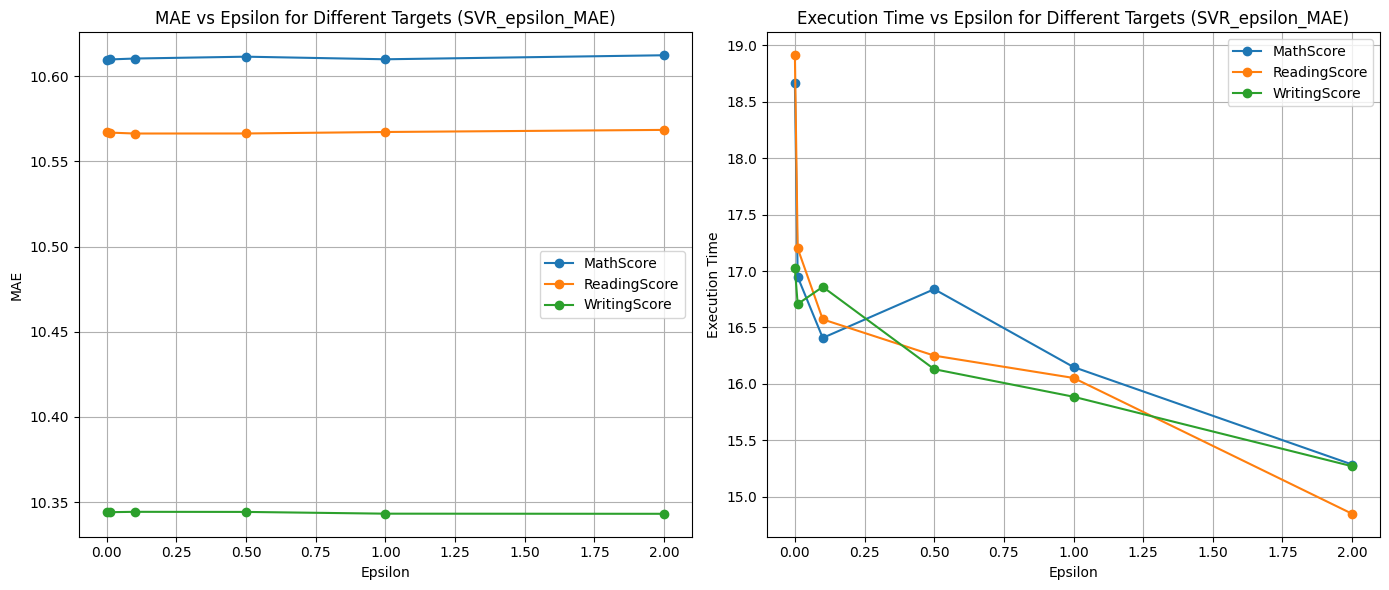

In [ ]:
epsilon_values = [0, 0.01, 0.1, 0.5, 1, 2]

# Initialize a dictionary to store the results
svr_results = {
    "Epsilon": [],
    "Target": [],
    "MAE": [],
    "Time": []
}

# Perform K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for epsilon in epsilon_values:
    for y_train, y_test, target_name in [(y1_train, y1_test, "MathScore"), (y2_train, y2_test, "ReadingScore"), (y3_train, y3_test, "WritingScore")]:
        mae_list = []
        time_list = []

        for train_index, test_index in kf.split(X_train):
            X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

            svr = SVR(C=0.1, kernel='linear', epsilon=epsilon)

            start_time = time.time()
            svr.fit(X_train_fold, y_train_fold)
            end_time = time.time()

            y_pred_fold = svr.predict(X_test_fold)

            mae_fold = mean_absolute_error(y_test_fold, y_pred_fold)
            mae_list.append(mae_fold)
            time_list.append(end_time - start_time)

        mae_mean = sum(mae_list) / len(mae_list)
        time_mean = sum(time_list) / len(time_list)

        svr_results["Epsilon"].append(epsilon)
        svr_results["Target"].append(target_name)
        svr_results["MAE"].append(mae_mean)
        svr_results["Time"].append(time_mean)

# Create a DataFrame from the results
SVR_epsilon_MAE = pd.DataFrame(svr_results)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Loop through unique targets for the first subplot
for target in SVR_epsilon_MAE["Target"].unique():
    target_data = SVR_epsilon_MAE[SVR_epsilon_MAE["Target"] == target]
    ax1.plot(target_data["Epsilon"], target_data["MAE"], marker='o', label=target)

# Add labels and title for the first subplot
ax1.set_xlabel("Epsilon")
ax1.set_ylabel("MAE")
ax1.set_title("MAE vs Epsilon for Different Targets (SVR_epsilon_MAE)")
ax1.legend()
ax1.grid(True)

# Loop through unique targets for the second subplot
for target in SVR_epsilon_MAE["Target"].unique():
    target_data = SVR_epsilon_MAE[SVR_epsilon_MAE["Target"] == target]
    ax2.plot(target_data["Epsilon"], target_data["Time"], marker='o', label=target)

# Add labels and title for the second subplot
ax2.set_xlabel("Epsilon")
ax2.set_ylabel("Execution Time")
ax2.set_title("Execution Time vs Epsilon for Different Targets (SVR_epsilon_MAE)")
ax2.legend()
ax2.grid(True)

# Display the subplots
plt.tight_layout()
plt.show()

## **Evaluating model with Linear Regression, Elastic Net Regression, and SVR.**

---



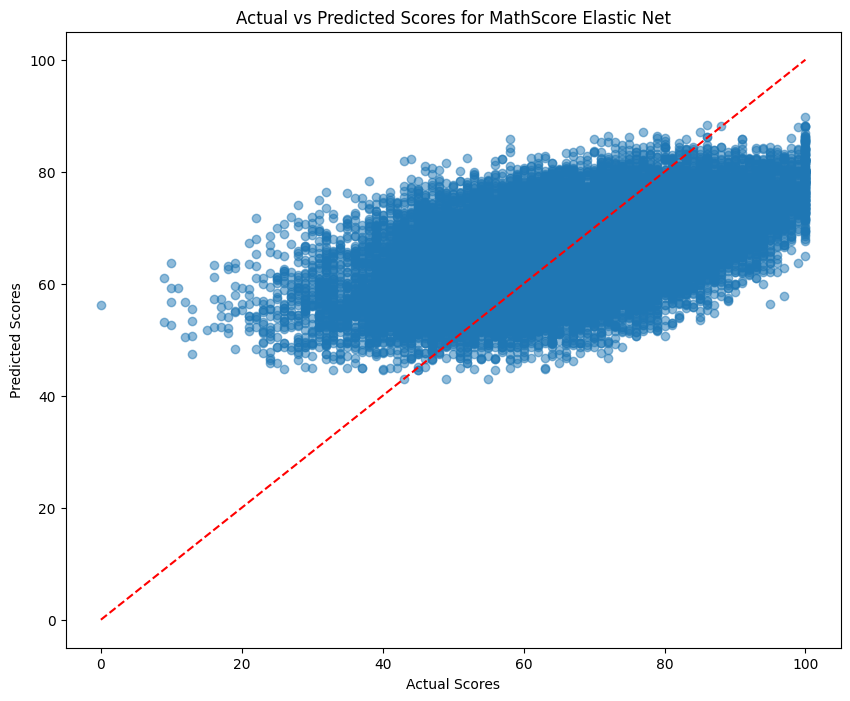

RMSE Values for MathScore Elastic Net : 13.135131377489955
MAE Values for MathScore Elastic Net : 10.62189249773834
R2 Score for MathScore Elastic Net : 0.2715921694327851
Execution Time for MathScore Elastic Net : 0.010937213897705078


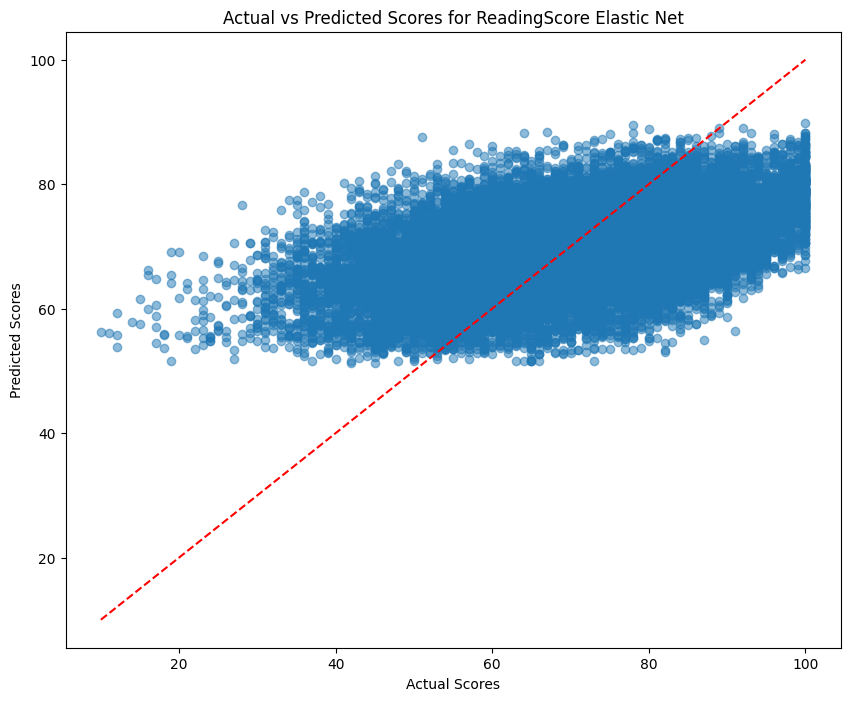

RMSE Values for ReadingScore Elastic Net : 13.041850751733659
MAE Values for ReadingScore Elastic Net : 10.581468182488342
R2 Score for ReadingScore Elastic Net : 0.22121792556262548
Execution Time for ReadingScore Elastic Net : 0.014324140548706055


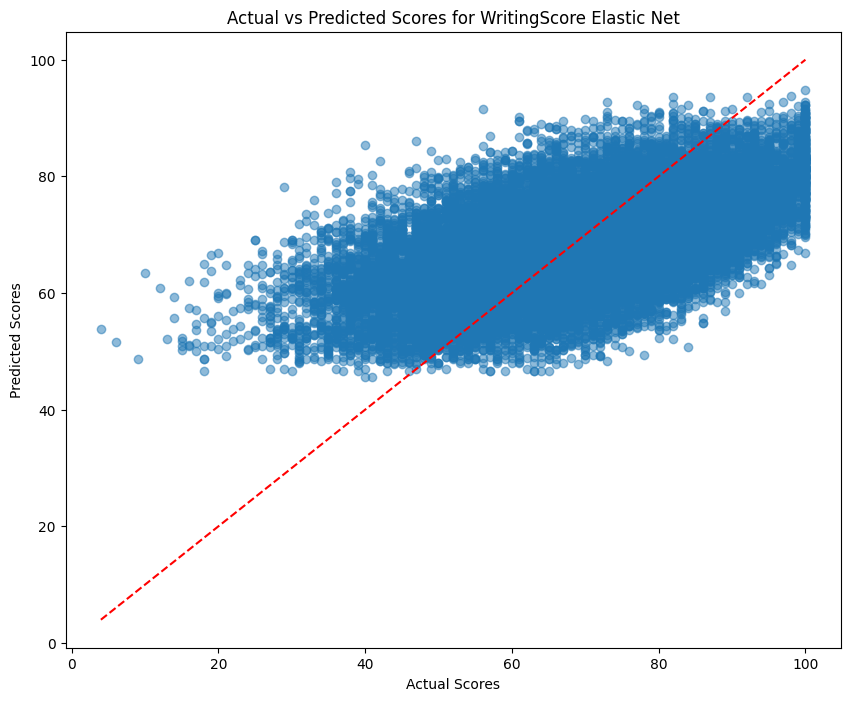

RMSE Values for WritingScore Elastic Net : 12.764013431008395
MAE Values for WritingScore Elastic Net : 10.363594238655004
R2 Score for WritingScore Elastic Net : 0.3182153195669771
Execution Time for WritingScore Elastic Net : 0.008742523193359376


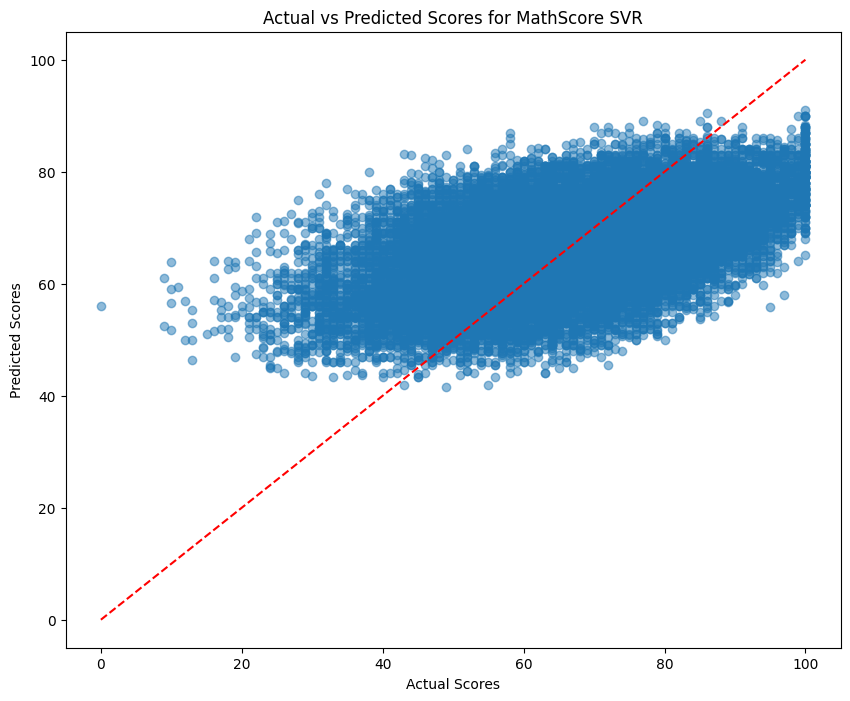

RMSE Values for MathScore SVR : 13.135478589943332
MAE Values for MathScore SVR : 10.612263770390316
R2 Score for MathScore SVR : 0.2715535565758283
Execution Time for MathScore SVR : 17.526980304718016


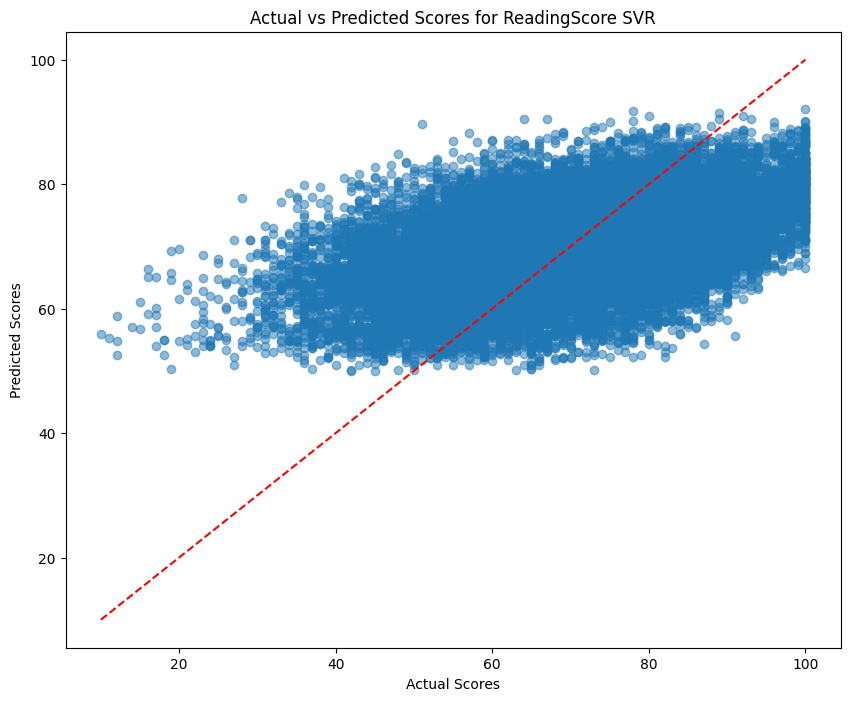

RMSE Values for ReadingScore SVR : 13.045299254832468
MAE Values for ReadingScore SVR : 10.56845399658528
R2 Score for ReadingScore SVR : 0.22080428110897304
Execution Time for ReadingScore SVR : 17.67731342315674


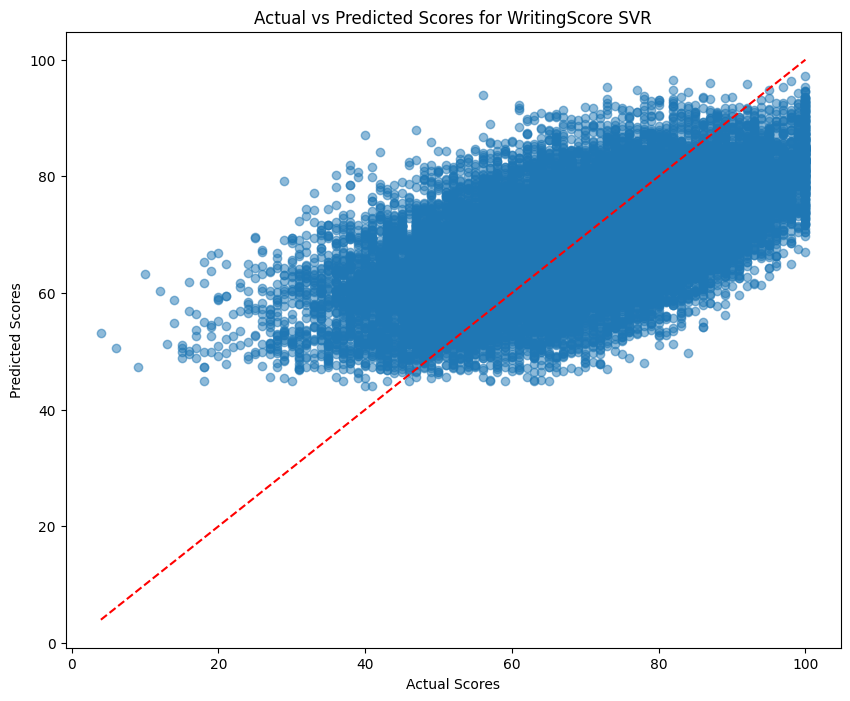

RMSE Values for WritingScore SVR : 12.75861388753592
MAE Values for WritingScore SVR : 10.34313020636941
R2 Score for WritingScore SVR : 0.3187913512590653
Execution Time for WritingScore SVR : 17.44343113899231


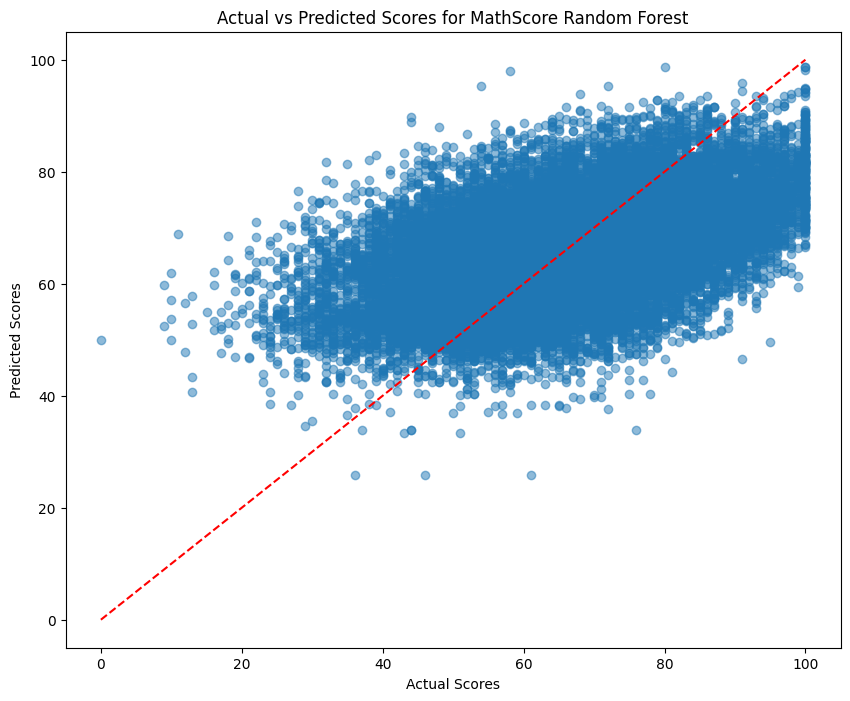

RMSE Values for MathScore Random Forest : 13.521220583264173
MAE Values for MathScore Random Forest : 10.90282800403126
R2 Score for MathScore Random Forest : 0.22805142342175241
Execution Time for MathScore Random Forest : 1.4886590003967286


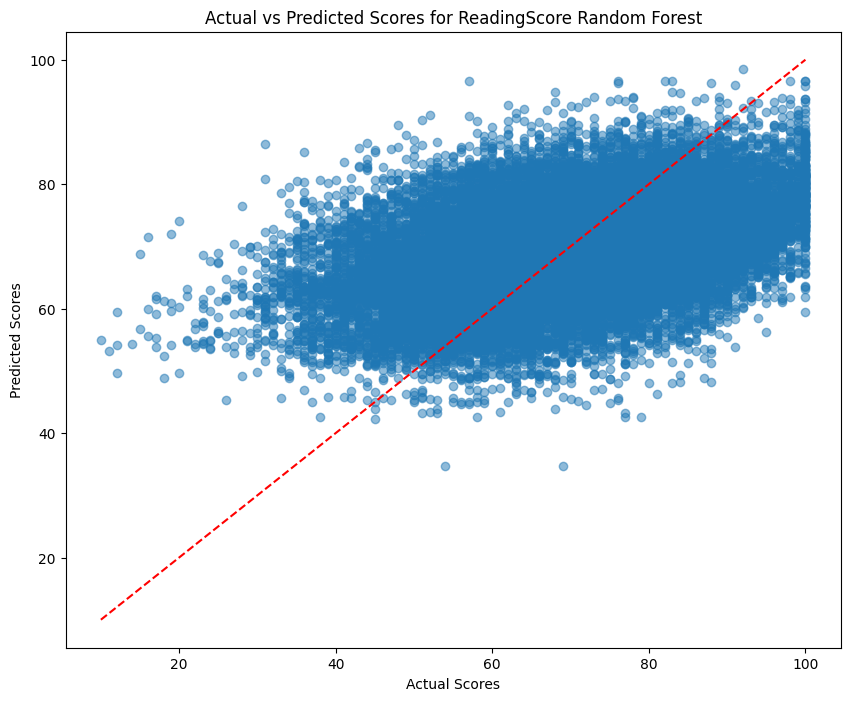

RMSE Values for ReadingScore Random Forest : 13.522657511512922
MAE Values for ReadingScore Random Forest : 10.939220645082427
R2 Score for ReadingScore Random Forest : 0.1627420057871227
Execution Time for ReadingScore Random Forest : 1.6021076679229735


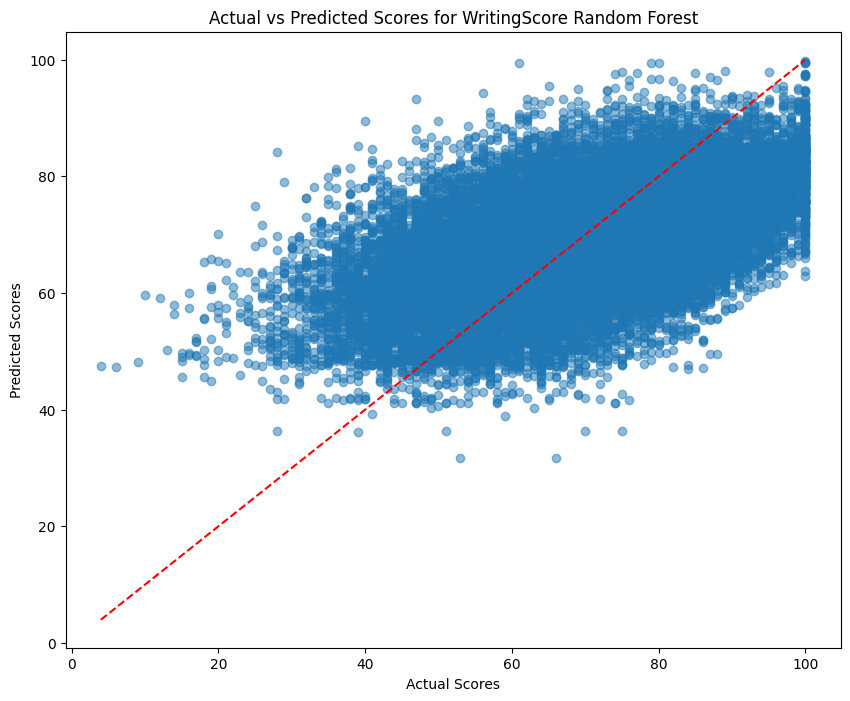

RMSE Values for WritingScore Random Forest : 13.230603479303728
MAE Values for WritingScore Random Forest : 10.694137835161385
R2 Score for WritingScore Random Forest : 0.26746327306994416
Execution Time for WritingScore Random Forest : 1.352525806427002


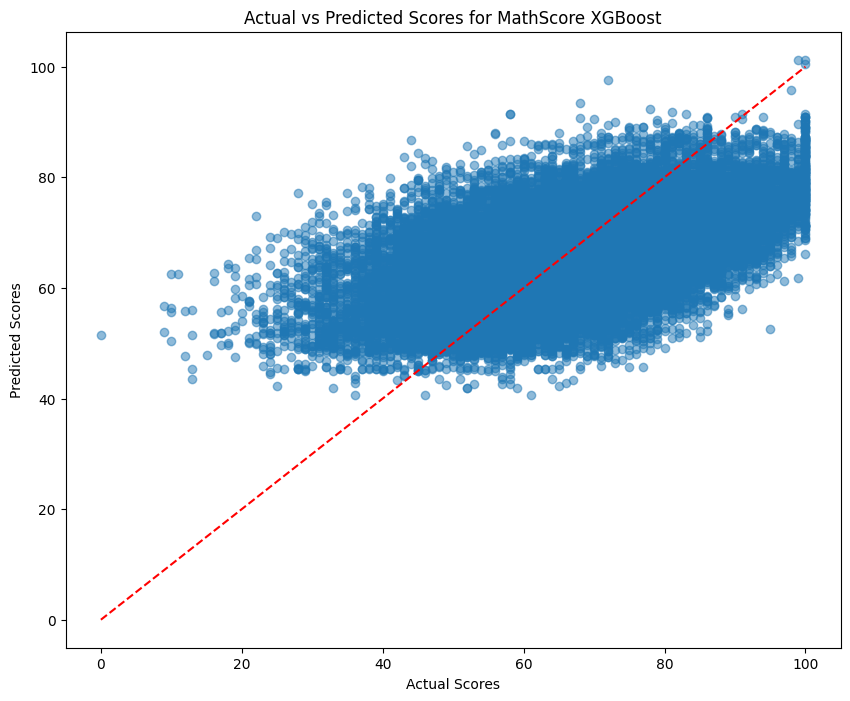

RMSE Values for MathScore XGBoost : 13.149624698320775
MAE Values for MathScore XGBoost : 10.636174146763011
R2 Score for MathScore XGBoost : 0.2699378820608995
Execution Time for MathScore XGBoost : 1.4455979824066163


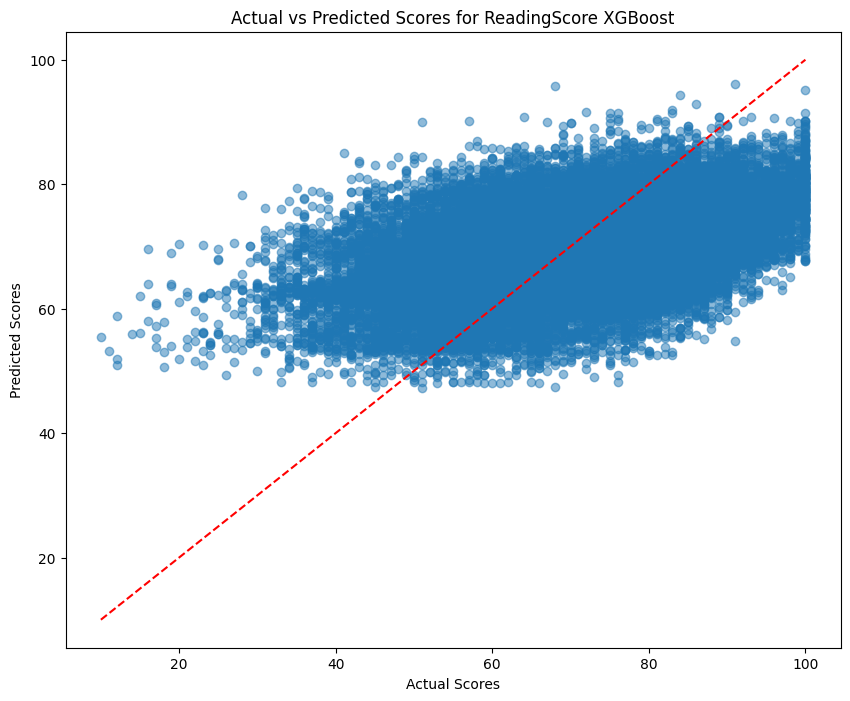

RMSE Values for ReadingScore XGBoost : 13.13608787996093
MAE Values for ReadingScore XGBoost : 10.651441533912292
R2 Score for ReadingScore XGBoost : 0.20992858982176177
Execution Time for ReadingScore XGBoost : 1.5865743637084961


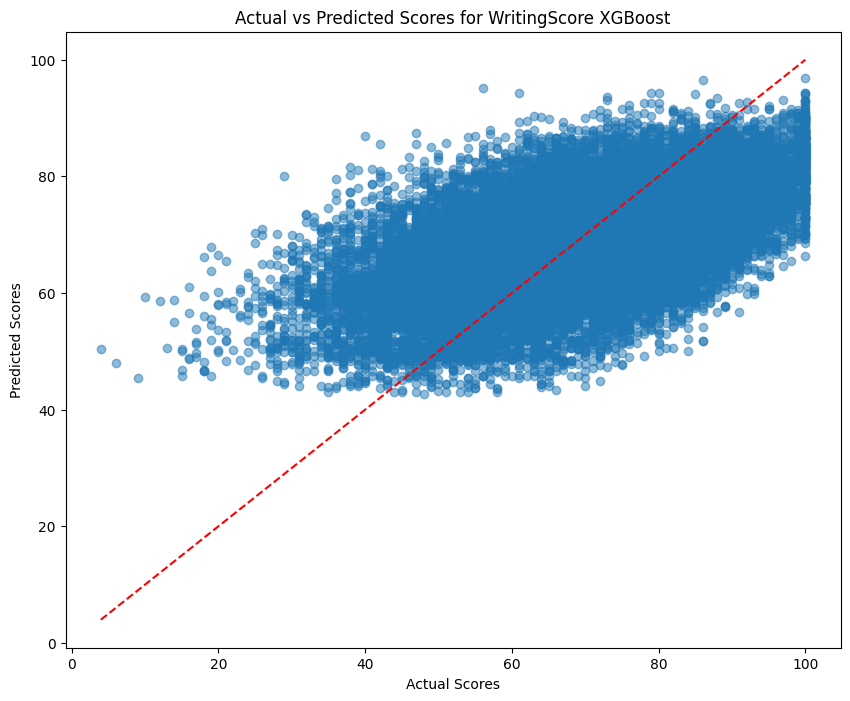

RMSE Values for WritingScore XGBoost : 12.85811845315481
MAE Values for WritingScore XGBoost : 10.422332735540875
R2 Score for WritingScore XGBoost : 0.30812631406556495
Execution Time for WritingScore XGBoost : 3.023964023590088


In [ ]:
# Initialize models
models = {
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "SVR": SVR(C=0.1, kernel='linear',epsilon=2),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(learning_rate=0.1, n_estimators=100, random_state=42)
}

# Create a dictionary to store evaluation results
results = {
    "Target": [],
    "Model": [],
    "RMSE": [],
    "MAE": [],
    "R2 Score": [],
    "Execution Time" : []
}


# Perform K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    for y_train, y_test, target_name in [(y1_train, y1_test, "MathScore"), (y2_train, y2_test, "ReadingScore"), (y3_train, y3_test, "WritingScore")]:
        rmse_list, mae_list, r2_list, execution_time_list = [], [], [], []
        all_actual_values, all_predicted_values = [], []

        for train_index, test_index in kf.split(X_train):
            X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

            start_time = time.time()
            model.fit(X_train_fold, y_train_fold)
            y_pred_fold = model.predict(X_test_fold)
            end_time = time.time()

            rmse_fold = np.sqrt(mean_squared_error(y_test_fold, y_pred_fold))
            mae_fold = mean_absolute_error(y_test_fold, y_pred_fold)
            r2_fold = r2_score(y_test_fold, y_pred_fold)
            execution_time_fold = end_time - start_time

            rmse_list.append(rmse_fold)
            mae_list.append(mae_fold)
            r2_list.append(r2_fold)
            execution_time_list.append(execution_time_fold)

            all_actual_values.extend(y_test_fold)
            all_predicted_values.extend(y_pred_fold)

        # Visualization: plot predicted vs actual values
        plt.figure(figsize=(10, 8))
        plt.scatter(all_actual_values, all_predicted_values, alpha=0.5)
        plt.plot([min(all_actual_values), max(all_actual_values)], [min(all_actual_values), max(all_actual_values)], color='red', linestyle='--')
        plt.xlabel("Actual Scores")
        plt.ylabel("Predicted Scores")
        plt.title(f"Actual vs Predicted Scores for {target_name} {model_name}")
        plt.show()

        rmse_mean = sum(rmse_list) / len(rmse_list)
        print(f'RMSE Values for {target_name} {model_name} :', rmse_mean)
        mae_mean = sum(mae_list) / len(mae_list)
        print(f'MAE Values for {target_name} {model_name} :', mae_mean)
        r2_mean = sum(r2_list) / len(r2_list)
        print(f'R2 Score for {target_name} {model_name} :', r2_mean)
        execution_time_mean = sum(execution_time_list) / len(execution_time_list)
        print(f'Execution Time for {target_name} {model_name} :', execution_time_mean)

        results["Target"].append(target_name)
        results["Model"].append(model_name)
        results["RMSE"].append(rmse_mean)
        results["MAE"].append(mae_mean)
        results["R2 Score"].append(r2_mean)
        results["Execution Time"].append(execution_time_mean)

# Create a DataFrame from the results dictionary
evaluation_df = pd.DataFrame(results)


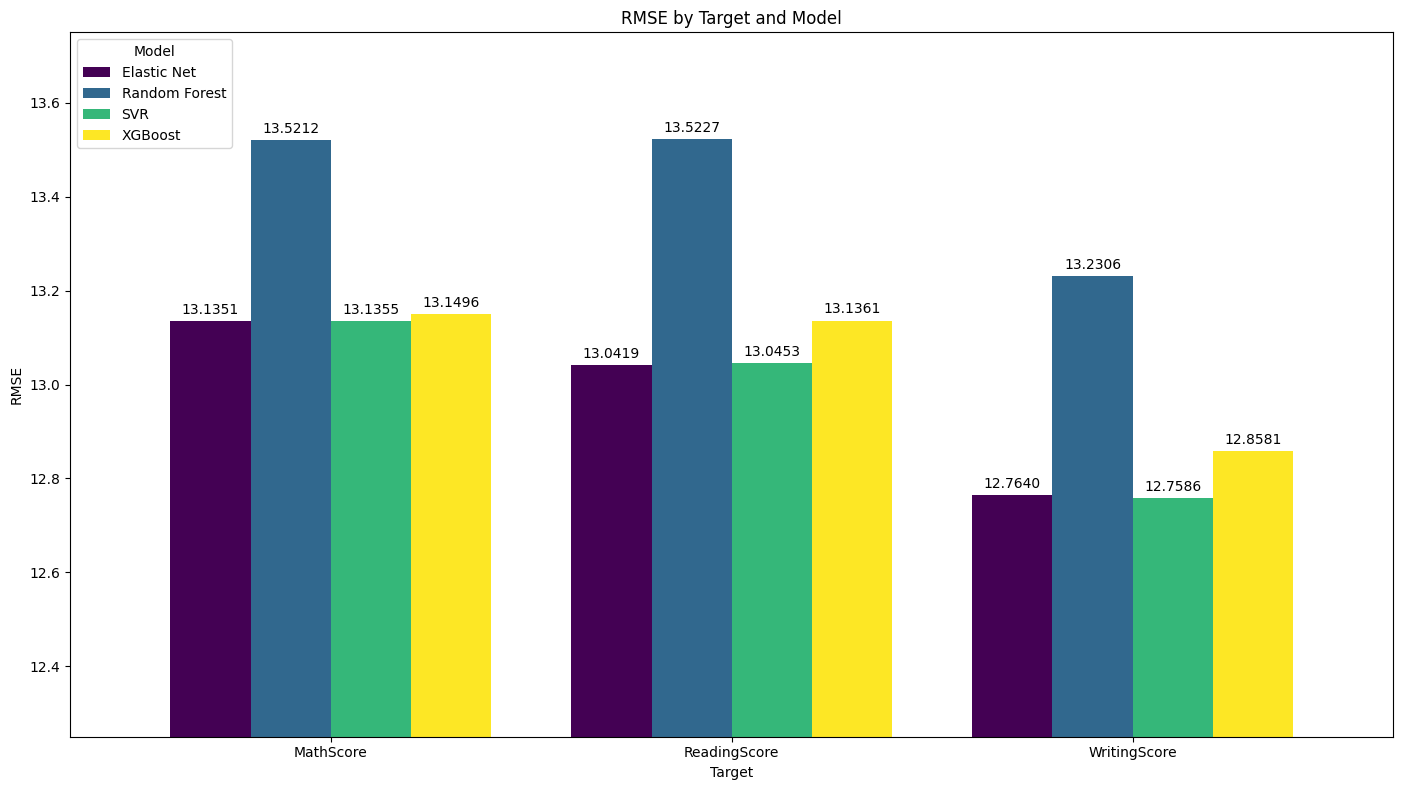

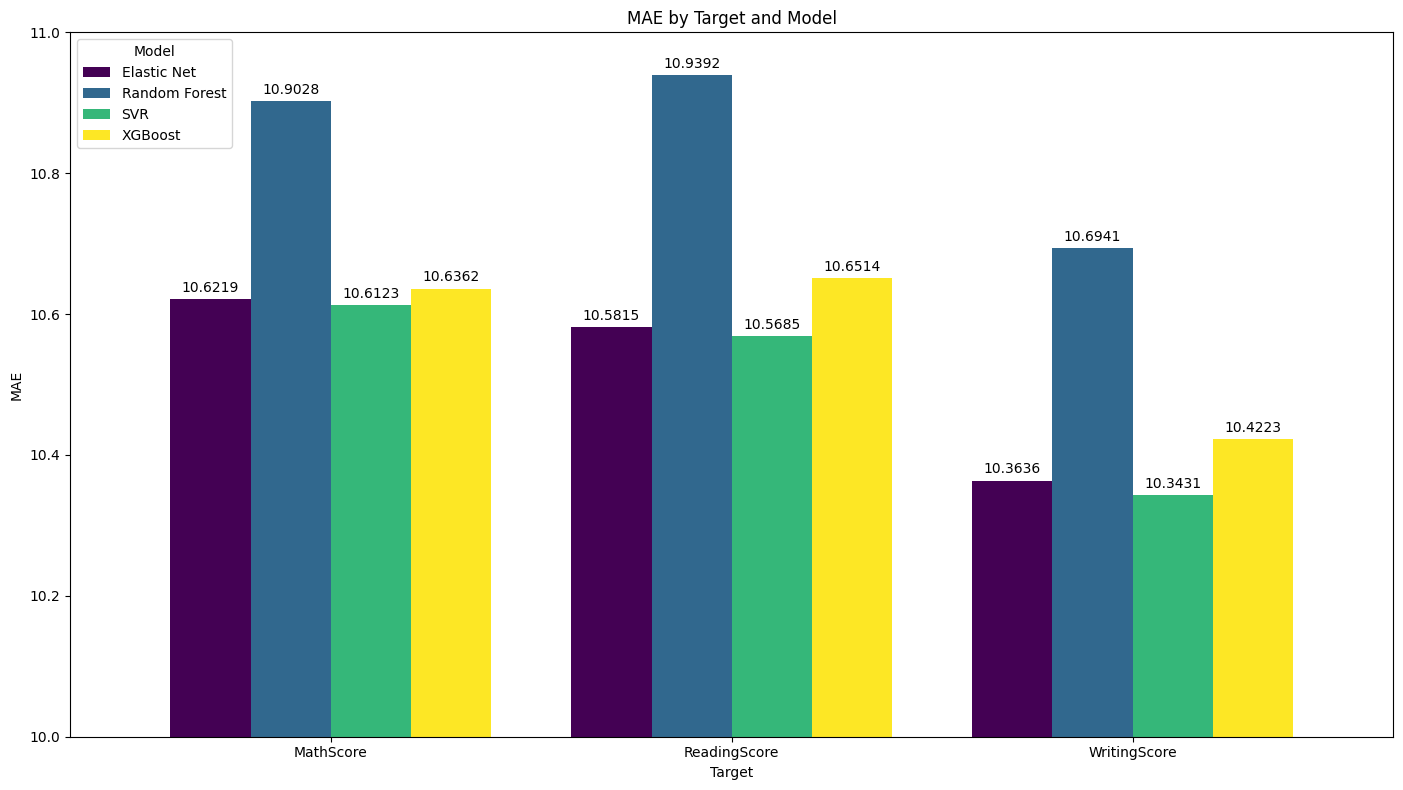

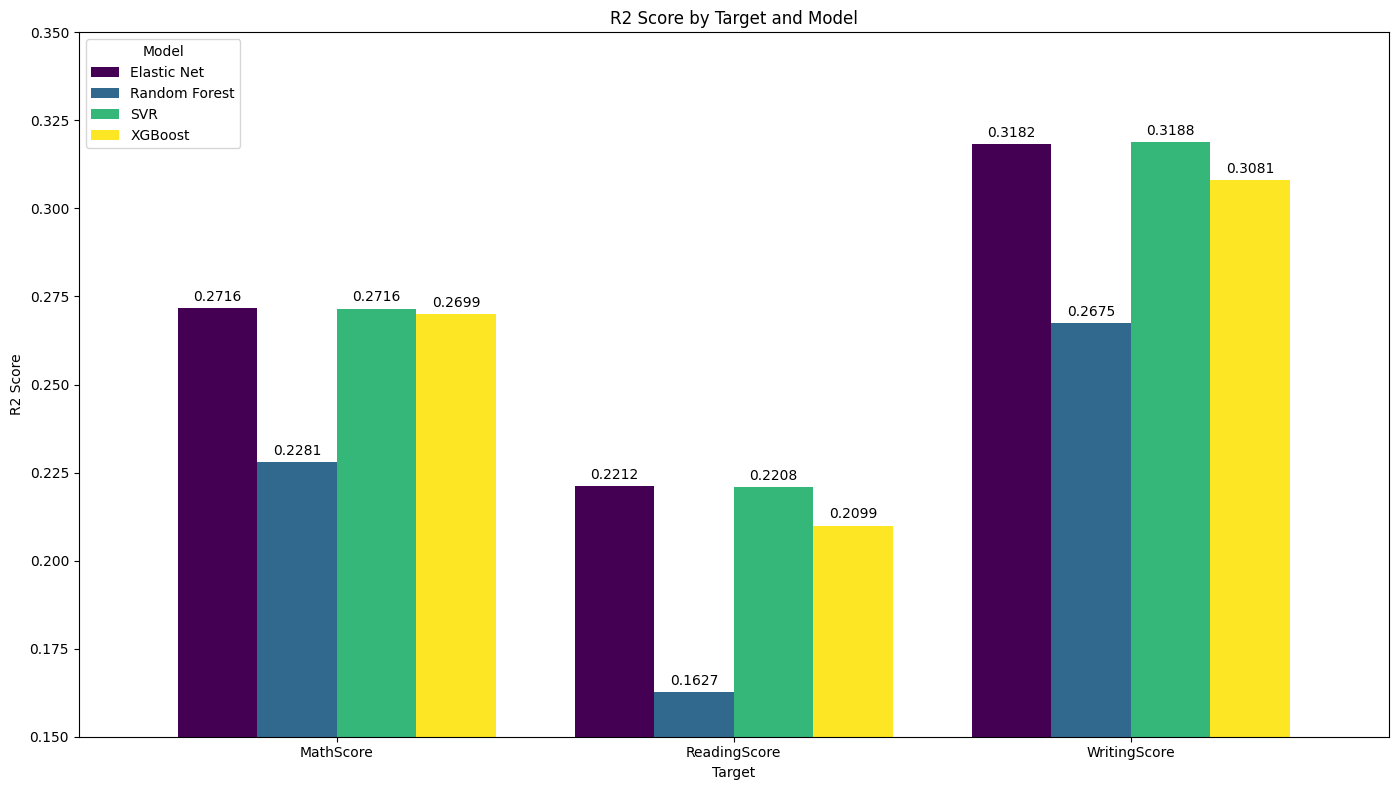

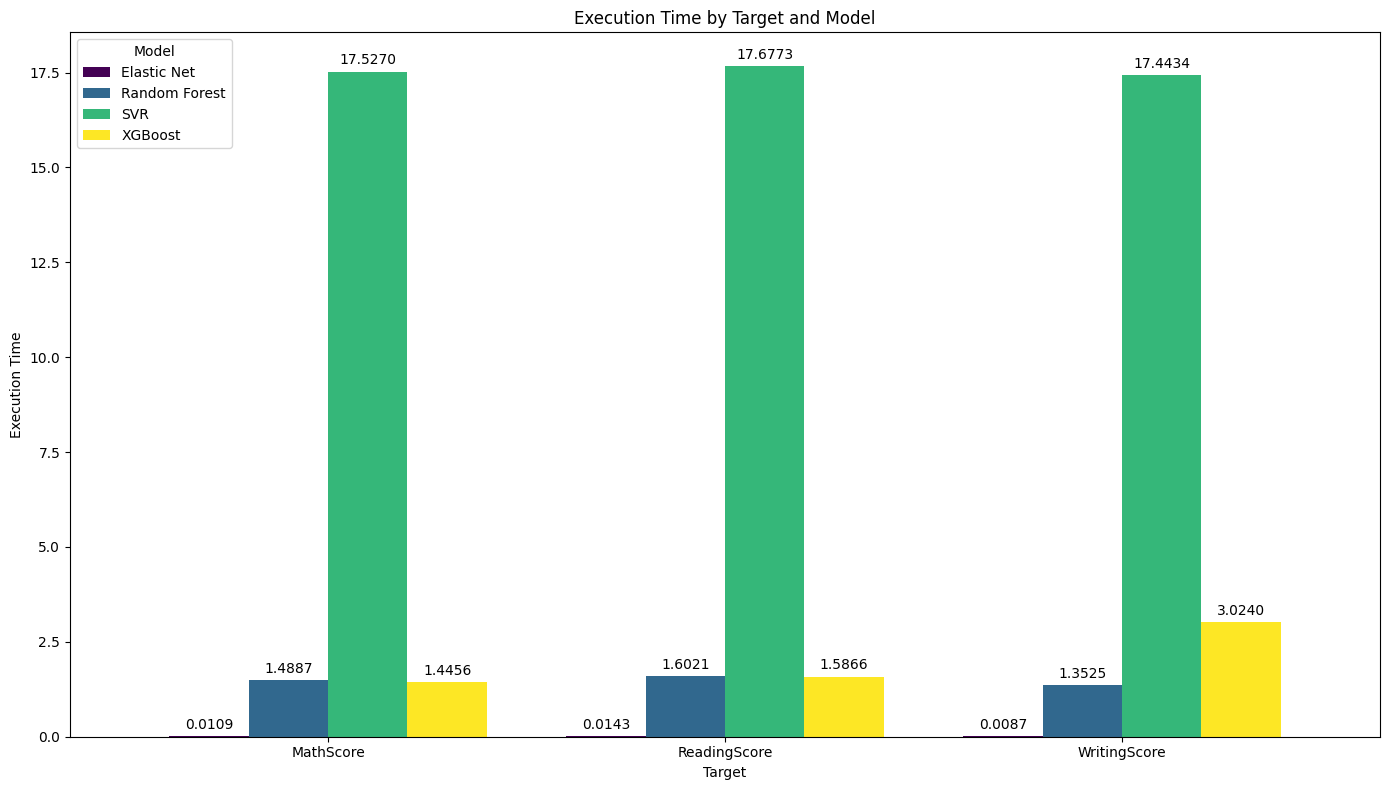

In [ ]:
# Create subplots for each evaluation metric and execution time
metrics = ["RMSE", "MAE", "R2 Score", "Execution Time"]

# Common legend position for all subplots
legend_bbox = (1, 1)

for metric in metrics:
    plt.figure(figsize=(14, 8))

    # Group the data by Target and Model for the current metric
    grouped = evaluation_df.groupby(["Target", "Model"])[metric].mean().unstack()

    # Create a bar plot with spacing between bars
    ax = grouped.plot(kind="bar", ax=plt.gca(), colormap="viridis", width=0.8)  # Adjust the width as needed

    plt.title(f"{metric} by Target and Model")
    plt.ylabel(metric)
    plt.xticks(rotation=0)  # Rotate labels by 90 degrees
    plt.tight_layout()

    # Set the legend position
    plt.legend(title="Model", loc="upper left")

    if metric == "RMSE":
        plt.ylim(12.25, 13.75)  # Set y-axis limits for RMSE
    elif metric == "MAE":
        plt.ylim(10, 11)  # Set y-axis limits for MAE
    elif metric == "R2 Score":
        plt.ylim(0.15, 0.35)  # Set y-axis limits for R2 Score

    # Display values inside the bars with four decimal places
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f"{height:.4f}", xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha="center", va="bottom")

    plt.show()


# **Create Prediction Model**

In [ ]:
# Initialize ElasticNet models for each target
elastic_math_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_read_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_write_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the models using the training data
elastic_math_model.fit(X_train, y1_train)
elastic_read_model.fit(X_train, y2_train)
elastic_write_model.fit(X_train, y3_train)

ElasticNet(alpha=0.1)

# **Testing New Data**

In [ ]:
data_baru = {'Gender': ['female'],
            'EthnicGroup': ['group E'],
            'ParentEduc': ['masters degree'],
            'LunchType': ['standard'],
            'TestPrep': ['none'],
            'ParentMaritalStatus': ['single'],
            'PracticeSport': ['sometimes'],
            'IsFirstChild': ['yes'],
            'NrSiblings': [0],
            'TransportMeans': ['school_bus'],
            'WklyStudyHours': ['Between 5-10 hours']}

tmp=pd.DataFrame.from_dict(data_baru,orient='index').transpose()

# Fixing the values in the column
tmp['Gender'] = tmp['Gender'].map(gender_mapping)
tmp['LunchType'] = tmp['LunchType'].map(lunch_mapping)
tmp['IsFirstChild'] = tmp['IsFirstChild'].map(value_mapping)
tmp['TestPrep'] = tmp['TestPrep'].map(test_mapping)
tmp['TransportMeans'] = tmp['TransportMeans'].map(bus_mapping)
tmp['PracticeSport'] = tmp['PracticeSport'].map(sport_mapping)
tmp['ParentEduc'] = tmp['ParentEduc'].map(pedu_mapping)
tmp['WklyStudyHours'] = tmp['WklyStudyHours'].map(weekly_mapping)
tmp['EthnicGroup'] = tmp['EthnicGroup'].map(ethnic_mapping)

#One Hot Encoding
categorical_cols = ['ParentMaritalStatus']
for col in categorical_cols:
    tmp = pd.get_dummies(tmp, columns=[col], prefix = [col], drop_first=False)

#add missing column
for kolom in one_hot_columns:
    if kolom not in tmp.columns:
        tmp[kolom] = 0

tmp = tmp[one_hot_columns]
scaled_tmp = pd.DataFrame(scaler.transform(tmp))
scaled_tmp.columns = tmp.columns.values
scaled_tmp.index = tmp.index.values

print("Prediksi Menggunakan Elastic Net Reggression:")
math_elastic_pred = elastic_math_model.predict(scaled_tmp)
print("math_elastic_pred :",math_elastic_pred)
read_elastic_pred = elastic_read_model.predict(scaled_tmp)
print("read_elastic_pred :",read_elastic_pred)
write_elastic_pred = elastic_write_model.predict(scaled_tmp)
print("write_elastic_pred :",write_elastic_pred)

Prediksi Menggunakan Elastic Net Reggression:
math_elastic_pred : [77.4720285]
read_elastic_pred : [82.34576792]
write_elastic_pred : [83.57066448]


# **Saving Models into Pickle**

In [ ]:
# Save the Elastic Net models using pickle
with open('elastic_math_model.pkl', 'wb') as f:
    pickle.dump(elastic_math_model, f)

with open('elastic_read_model.pkl', 'wb') as f:
    pickle.dump(elastic_read_model, f)

with open('elastic_write_model.pkl', 'wb') as f:
    pickle.dump(elastic_write_model, f)